In [6]:
# importing libraries
import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [7]:
df  = pd.read_csv('price.csv')
df.head()

,Unnamed: 0,Airline,Source,Destination,Dep_time,Arr_time,Durtion,Route,stop
0,0,SpiceJet,Bangalore,Delhi,05:55,08:35,02h 40m,BLR--->DEL,non-stop
1,1,GO FIRST,Bangalore,Delhi,21:30,00:15,02h 45m,BLR--->DEL,non-stop
2,2,SpiceJet,Bangalore,Delhi,21:50,00:35,02h 45m,BLR--->DEL,non-stop
3,3,GO FIRST,Bangalore,Delhi,05:45,08:40,02h 55m,BLR--->DEL,non-stop
4,4,Indigo,Bangalore,Delhi,00:45,03:30,02h 45m,BLR--->DEL,non-stop


In [8]:
df.set_index("Unnamed: 0")

,Airline,Source,Destination,Dep_time,Arr_time,Durtion,Route,stop
Unnamed: 0,,,,,,,,
0,SpiceJet,Bangalore,Delhi,05:55,08:35,02h 40m,BLR--->DEL,non-stop
1,GO FIRST,Bangalore,Delhi,21:30,00:15,02h 45m,BLR--->DEL,non-stop
2,SpiceJet,Bangalore,Delhi,21:50,00:35,02h 45m,BLR--->DEL,non-stop
3,GO FIRST,Bangalore,Delhi,05:45,08:40,02h 55m,BLR--->DEL,non-stop
4,Indigo,Bangalore,Delhi,00:45,03:30,02h 45m,BLR--->DEL,non-stop
...,...,...,...,...,...,...,...,...
10176,Vistara,Bangalore,Delhi,09:30,16:20,06h 50m,BLR--->DED,1-stop Via Mumbai
10177,AirAsia,Bangalore,Delhi,16:15,01:50,09h 35m,BLR--->HYD,2+-stop
10178,AirAsia,Bangalore,Delhi,14:25,01:50,11h 25m,BLR--->HYD,2+-stop


In [9]:
df1  = pd.read_csv('Flight.csv')
df.head()

,Unnamed: 0,Airline,Source,Destination,Dep_time,Arr_time,Durtion,Route,stop
0,0,SpiceJet,Bangalore,Delhi,05:55,08:35,02h 40m,BLR--->DEL,non-stop
1,1,GO FIRST,Bangalore,Delhi,21:30,00:15,02h 45m,BLR--->DEL,non-stop
2,2,SpiceJet,Bangalore,Delhi,21:50,00:35,02h 45m,BLR--->DEL,non-stop
3,3,GO FIRST,Bangalore,Delhi,05:45,08:40,02h 55m,BLR--->DEL,non-stop
4,4,Indigo,Bangalore,Delhi,00:45,03:30,02h 45m,BLR--->DEL,non-stop


In [10]:
df1.set_index("Unnamed: 0")

,Date,price
Unnamed: 0,,
0,Jun 02,"5,584"
1,Jun 02,"5,584"
2,Jun 02,"5,584"
3,Jun 02,"6,844"
4,Jun 02,"6,844"
...,...,...
1651,Jul 16,"9,679"
1652,Jul 16,"9,679"
1653,Jul 16,"9,679"


In [11]:
flight = df.merge(df1, left_on='Unnamed: 0', right_on='Unnamed: 0', right_index=True, how='left')
flight.head()

,Unnamed: 0_x,Airline,Source,Destination,Dep_time,Arr_time,Durtion,Route,stop,Unnamed: 0_y,Date,price
0,0,SpiceJet,Bangalore,Delhi,05:55,08:35,02h 40m,BLR--->DEL,non-stop,0.0,Jun 02,"5,584"
1,1,GO FIRST,Bangalore,Delhi,21:30,00:15,02h 45m,BLR--->DEL,non-stop,1.0,Jun 02,"5,584"
2,2,SpiceJet,Bangalore,Delhi,21:50,00:35,02h 45m,BLR--->DEL,non-stop,2.0,Jun 02,"5,584"
3,3,GO FIRST,Bangalore,Delhi,05:45,08:40,02h 55m,BLR--->DEL,non-stop,3.0,Jun 02,"6,844"
4,4,Indigo,Bangalore,Delhi,00:45,03:30,02h 45m,BLR--->DEL,non-stop,4.0,Jun 02,"6,844"


In [12]:
#  Check the date 
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10181 entries, 0 to 10180
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0_x  10181 non-null  int64  
 1   Airline       10181 non-null  object 
 2   Source        10181 non-null  object 
 3   Destination   10181 non-null  object 
 4   Dep_time      10181 non-null  object 
 5   Arr_time      10181 non-null  object 
 6   Durtion       10181 non-null  object 
 7   Route         10181 non-null  object 
 8   stop          10181 non-null  object 
 9   Unnamed: 0_y  1656 non-null   float64
 10  Date          1656 non-null   object 
 11  price         1656 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 954.6+ KB


In [13]:
# Check the shape
flight.shape

(10181, 12)

# DATA Cleaning

In [14]:
# Check the null Values
flight.isnull().sum()

Unnamed: 0_x       0
Airline            0
Source             0
Destination        0
Dep_time           0
Arr_time           0
Durtion            0
Route              0
stop               0
Unnamed: 0_y    8525
Date            8525
price           8525
dtype: int64

In [15]:
# drop the null values
flight.dropna(inplace=True)

In [16]:
flight.drop(['Unnamed: 0_y','Unnamed: 0_x' ], axis=1, inplace=True)

In [17]:
flight.head()

,Airline,Source,Destination,Dep_time,Arr_time,Durtion,Route,stop,Date,price
0,SpiceJet,Bangalore,Delhi,05:55,08:35,02h 40m,BLR--->DEL,non-stop,Jun 02,"5,584"
1,GO FIRST,Bangalore,Delhi,21:30,00:15,02h 45m,BLR--->DEL,non-stop,Jun 02,"5,584"
2,SpiceJet,Bangalore,Delhi,21:50,00:35,02h 45m,BLR--->DEL,non-stop,Jun 02,"5,584"
3,GO FIRST,Bangalore,Delhi,05:45,08:40,02h 55m,BLR--->DEL,non-stop,Jun 02,"6,844"
4,Indigo,Bangalore,Delhi,00:45,03:30,02h 45m,BLR--->DEL,non-stop,Jun 02,"6,844"


In [18]:
flight.columns

Index(['Airline', 'Source', 'Destination', 'Dep_time', 'Arr_time', 'Durtion',
       'Route', 'stop', 'Date', 'price'],
      dtype='object')

In [19]:
flight.tail()

,Airline,Source,Destination,Dep_time,Arr_time,Durtion,Route,stop,Date,price
1651,Vistara,Bangalore,Delhi,07:45,19:55,12h 10m,BLR--->HYD,1-stop,Jul 16,"9,679"
1652,Vistara,Bangalore,Delhi,20:10,09:00,12h 50m,BLR--->HYD,1-stop,Jul 16,"9,679"
1653,Vistara,Bangalore,Delhi,07:45,22:45,15h 00m,BLR--->HYD,1-stop,Jul 16,"9,679"
1654,Vistara,Bangalore,Delhi,20:10,12:30,16h 20m,BLR--->HYD,1-stop,Jul 16,"9,889"
1655,Vistara,Bangalore,Delhi,20:10,15:40,19h 30m,BLR--->HYD,1-stop,Jul 16,"10,204"


In [20]:
flight.nunique()

Airline          6
Source           1
Destination      1
Dep_time       108
Arr_time       134
Durtion        140
Route           27
stop             5
Date            45
price           42
dtype: int64

In [21]:
flight.dtypes

Airline        object
Source         object
Destination    object
Dep_time       object
Arr_time       object
Durtion        object
Route          object
stop           object
Date           object
price          object
dtype: object

# Exploratory Data Analysis

- We can see all the attributes in data set are in categorical format which is not suitable for building our models, hence we need to convert all these into numerical format.

In [22]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1656 entries, 0 to 1655
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Airline      1656 non-null   object
 1   Source       1656 non-null   object
 2   Destination  1656 non-null   object
 3   Dep_time     1656 non-null   object
 4   Arr_time     1656 non-null   object
 5   Durtion      1656 non-null   object
 6   Route        1656 non-null   object
 7   stop         1656 non-null   object
 8   Date         1656 non-null   object
 9   price        1656 non-null   object
dtypes: object(10)
memory usage: 142.3+ KB


In [23]:
#checking the names of all the attributes in the data sets

print(' Column names:\n',flight.columns)

 Column names:
 Index(['Airline', 'Source', 'Destination', 'Dep_time', 'Arr_time', 'Durtion',
       'Route', 'stop', 'Date', 'price'],
      dtype='object')


##### Let us check the null values for the datasets, and treat them.

In [24]:
flight.isnull().sum()

Airline        0
Source         0
Destination    0
Dep_time       0
Arr_time       0
Durtion        0
Route          0
stop           0
Date           0
price          0
dtype: int64

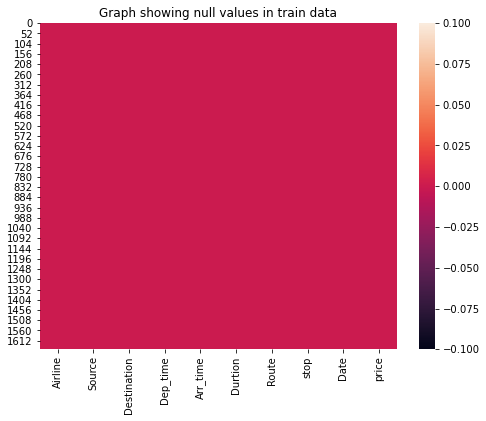

In [25]:
#visualizing the null values after the removal for both train and test data

plt.figure(figsize=(8,6),facecolor='white')
sns.heatmap(flight.isnull())
plt.title('Graph showing null values in train data')
plt.show()

In [26]:
# let us check the unique values present in the dataset

for i in flight:
    print('Name of the attribute: ',i,'\n',flight[i].value_counts())

Name of the attribute:  Airline 
 Vistara      415
Indigo       351
Air India    263
AirAsia      251
GO FIRST     226
SpiceJet     150
Name: Airline, dtype: int64
Name of the attribute:  Source 
 Bangalore    1656
Name: Source, dtype: int64
Name of the attribute:  Destination 
 Delhi    1656
Name: Destination, dtype: int64
Name of the attribute:  Dep_time 
 19:10    66
05:45    54
06:40    51
09:30    51
17:45    43
         ..
13:50     1
04:45     1
14:20     1
14:10     1
07:35     1
Name: Dep_time, Length: 108, dtype: int64
Name of the attribute:  Arr_time 
 18:20    40
12:10    38
08:55    31
20:10    28
19:55    27
         ..
18:00     2
12:55     1
13:10     1
22:15     1
07:40     1
Name: Arr_time, Length: 134, dtype: int64
Name of the attribute:  Durtion 
 02h 45m    120
02h 50m     48
02h 55m     47
06h 55m     46
06h 00m     43
          ... 
14h 35m      1
24h 10m      1
18h 35m      1
08h 40m      1
15h 55m      1
Name: Durtion, Length: 140, dtype: int64
Name of the attr

# Observations
- There are no null values in the dataset.
- We need to extract important information from the Arrival time, departure time, so that we can have clear picture of the dataset.

# Univariate Analysis

 - Let us visualize the distribution, relationship and information of all the attributes using various graph methods.

Vistara      415
Indigo       351
Air India    263
AirAsia      251
GO FIRST     226
SpiceJet     150
Name: Airline, dtype: int64


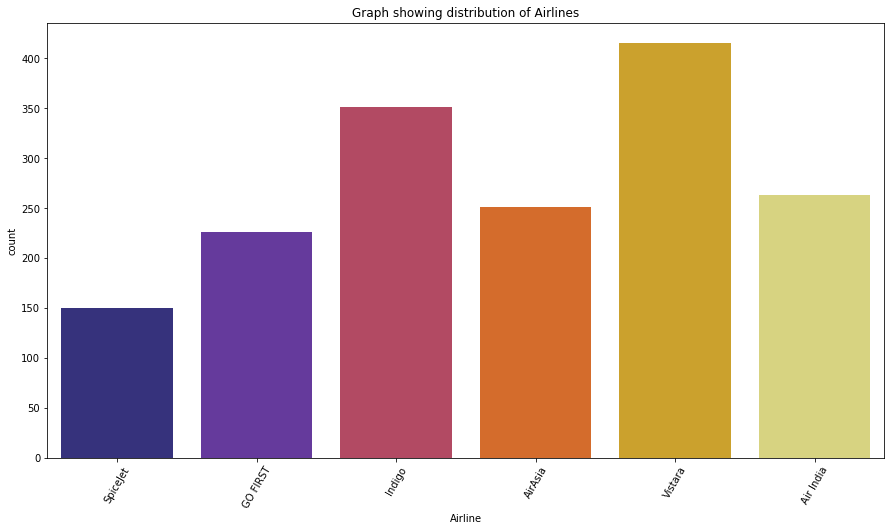

In [27]:
#using bar graph
print(flight['Airline'].value_counts())

plt.figure(figsize=(15,8),facecolor='white')
sns.countplot(flight['Airline'],palette='CMRmap')
plt.title('Graph showing distribution of Airlines')
plt.xticks(rotation=60)
plt.show()

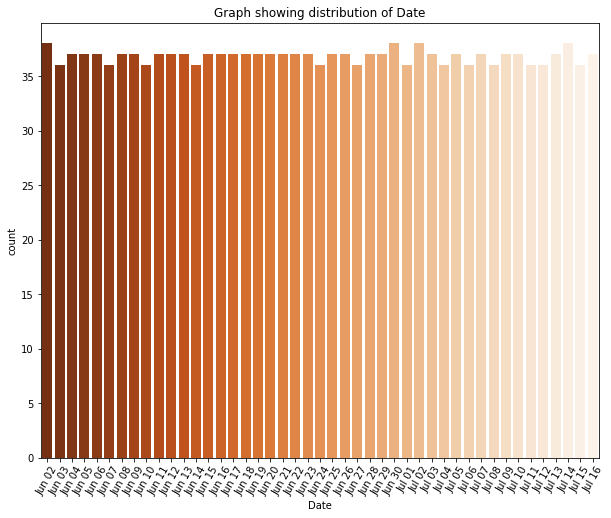

In [28]:
#Using bar graph

plt.figure(figsize=(10,8),facecolor='white')
sns.countplot(flight['Date'],palette='Oranges_r')
plt.title('Graph showing distribution of Date')
plt.xticks(rotation=60)
plt.show()

1-stop                  1296
non-stop                 287
2+-stop                   52
1-stop Via Hyderabad      14
1-stop Via Mumbai          7
Name: stop, dtype: int64


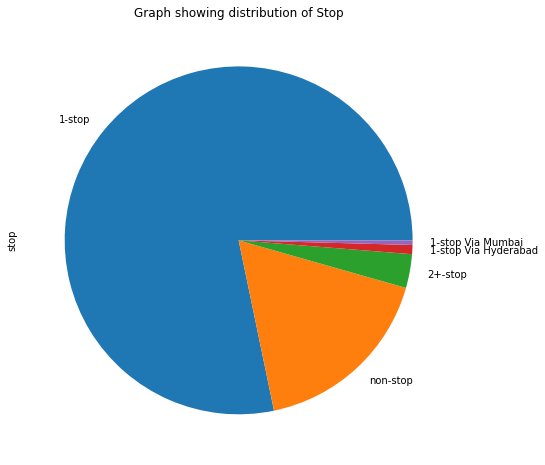

In [29]:
#Using pie graph
print(flight['stop'].value_counts())

plt.figure(figsize=(10,8),facecolor='white')
flight['stop'].value_counts().plot(kind='pie')
plt.title('Graph showing distribution of Stop')
plt.xticks(rotation=60)
plt.show()

BLR--->BOM    501
BLR--->DEL    287
BLR--->HYD    241
BLR--->PNQ    110
BLR--->CCU     77
BLR--->GOI     74
BLR--->PAT     36
BLR--->IXR     36
BLR--->DBR     28
BLR--->GAU     26
BLR--->LKO     25
BLR--->JAI     23
BLR--->IDR     22
BLR--->COK     21
BLR--->MAA     17
BLR--->RPR     16
BLR--->BBI     15
BLR--->JLR     14
BLR--->IXC     14
BLR--->IXB     14
BLR--->AMD     14
BLR--->CJB     11
BLR--->NAG      9
BLR--->DED      7
BLR--->VTZ      7
BLR--->JRG      7
BLR--->VNS      4
Name: Route, dtype: int64


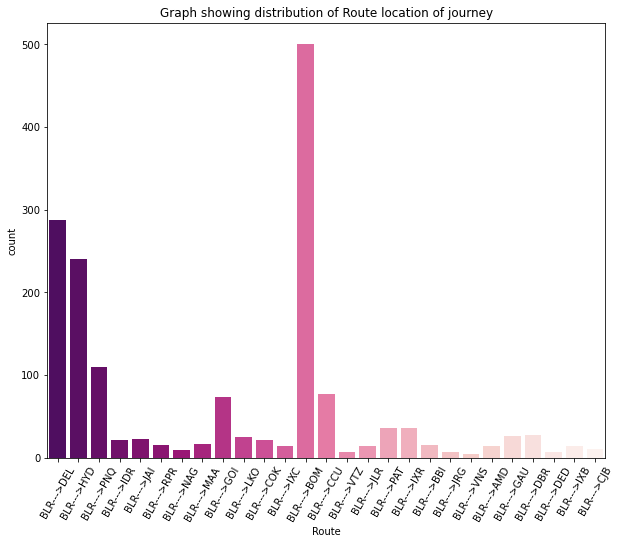

In [30]:
#Using bar graph
print(flight['Route'].value_counts())
plt.figure(figsize=(10,8),facecolor='white')
sns.countplot(flight['Route'],palette='RdPu_r')
plt.title('Graph showing distribution of Route location of journey')
plt.xticks(rotation=60)
plt.show()

# Changing the datatype of Price from categorical to Numerical

In [31]:
for i in range(len(flight)):
    flight['price'][i]=flight['price'][i].replace(',','')

flight['price'] = flight['price'].astype(int)

In [32]:
#cleaning the 'Total Stops' attribute
flight['stop'].replace(to_replace=['1-stop','1-stop Via Hyderabad','1-stop Via Mumbai'],value=1,inplace=True)
flight['stop'].replace(to_replace=['non-stop'],value=0,inplace=True)
flight['stop'].replace(to_replace=['2+-stop'],value=2,inplace=True)

flight['stop'].value_counts()

1    1317
0     287
2      52
Name: stop, dtype: int64

In [33]:
flight.stop.unique()

array([0, 1, 2], dtype=int64)

1    1317
0     287
2      52
Name: stop, dtype: int64


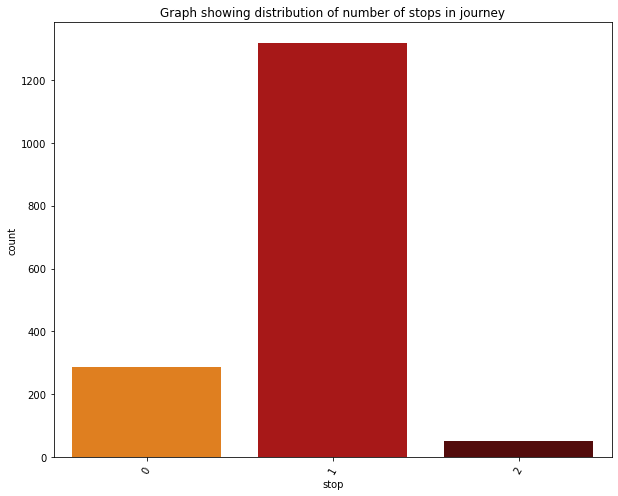

In [34]:
# using bar graph
print(flight['stop'].value_counts())

plt.figure(figsize=(10,8),facecolor='white')
sns.countplot(flight['stop'],palette='gist_heat_r')
plt.title('Graph showing distribution of number of stops in journey')
plt.xticks(rotation=60)

plt.show()

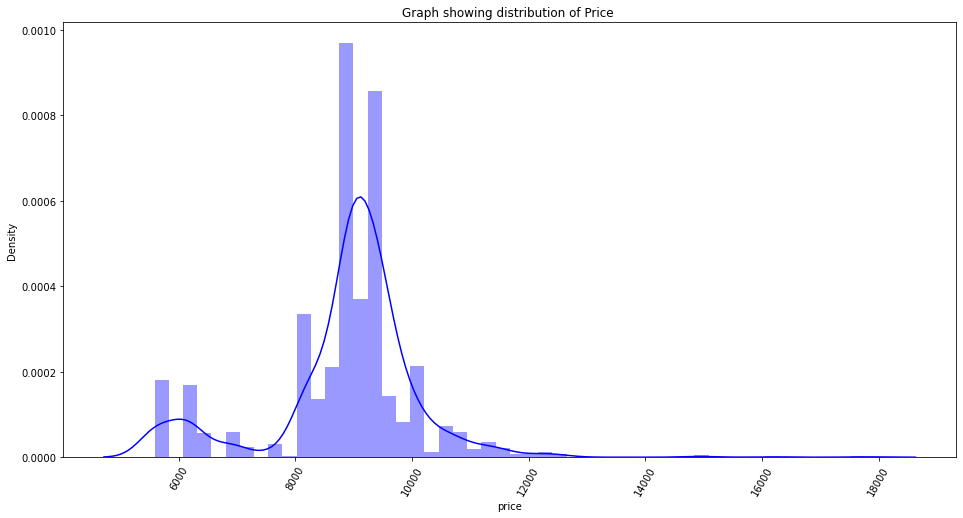

In [35]:
plt.figure(figsize=(16,8), facecolor='white')
sns.distplot(flight['price'], color='blue')
plt.xticks(rotation=60)
plt.title("Graph showing distribution of Price ")
plt.show()

- The price range was varied in between 5000 to 10000 on average.

# Bi-variate Analysis

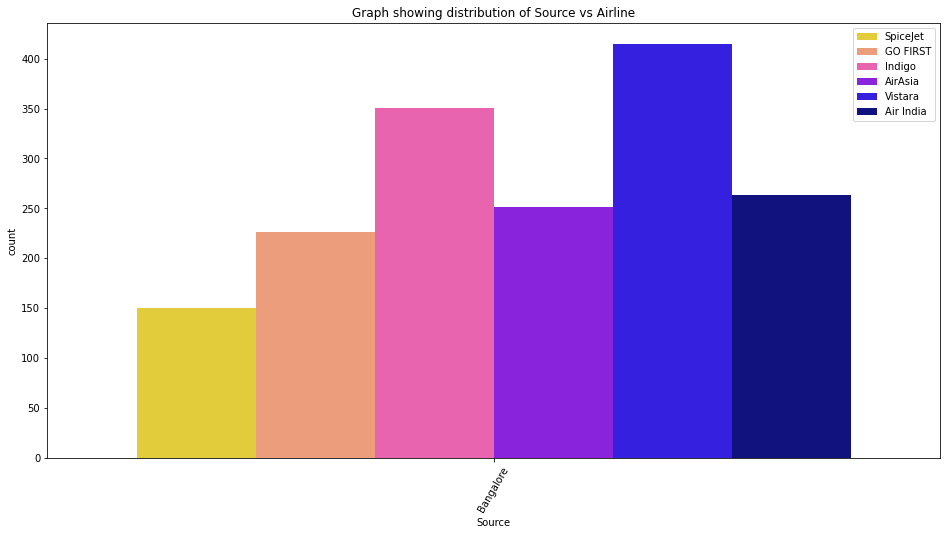

In [36]:
plt.figure(figsize=(16,8), facecolor='white')
sns.countplot(x='Source', hue='Airline', data=flight,palette='gnuplot2_r')
plt.xticks(rotation=60)
plt.title("Graph showing distribution of Source vs Airline")
plt.legend(loc = 'upper right')
plt.show()

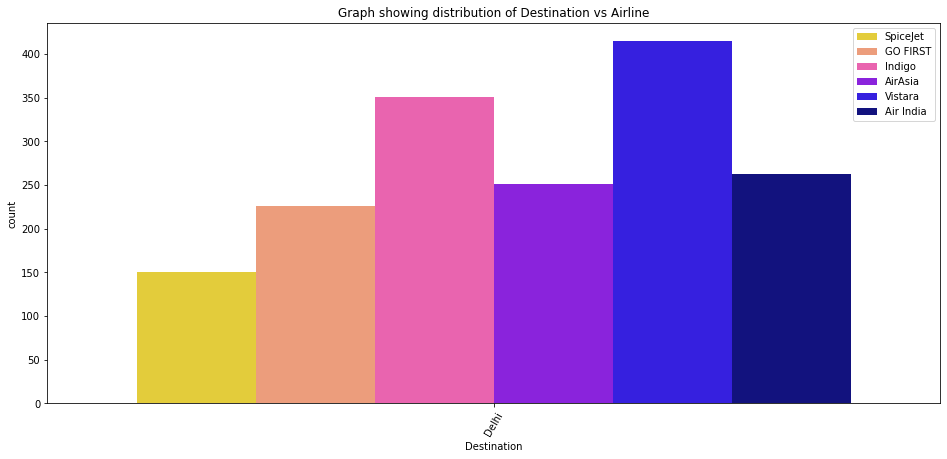

In [37]:
plt.figure(figsize=(16,7), facecolor='white')
sns.countplot(x='Destination', hue='Airline', data=flight,palette='gnuplot2_r')
plt.xticks(rotation=60)
plt.title("Graph showing distribution of Destination vs Airline")
plt.legend(loc = 'upper right')
plt.show()

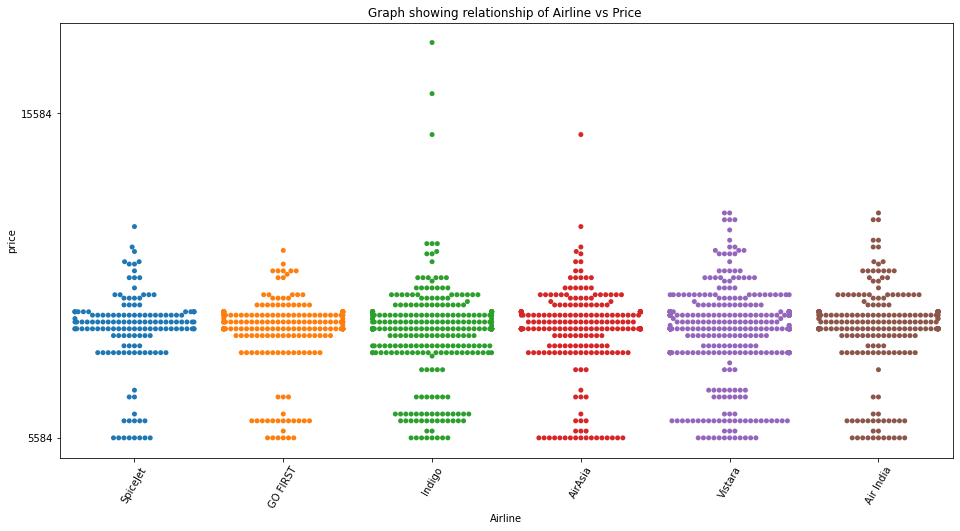

In [38]:
plt.figure(figsize=(16,8), facecolor='white')
sns.swarmplot(y='price', x='Airline', data=flight)
plt.title("Graph showing relationship of Airline vs Price ")
plt.xticks(rotation=60)
plt.yticks(np.arange(min(flight['price']), max(flight['price']), 10000))
plt.show()

# Observations

- We see vistara and Indigo are the highest used airline
- The average price of flights have average price of 7500-10000.

Vistara      415
Indigo       351
Air India    263
AirAsia      251
GO FIRST     226
SpiceJet     150
Name: Airline, dtype: int64


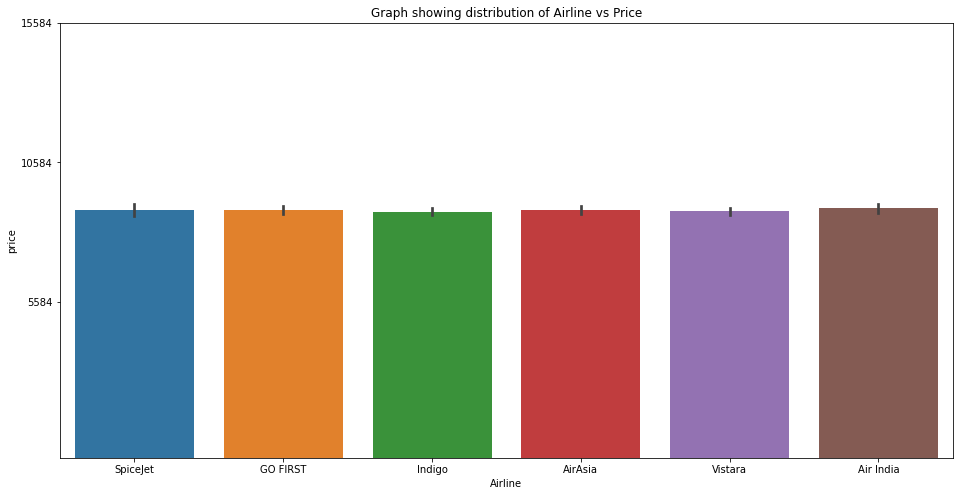

In [39]:
print(flight['Airline'].value_counts())

plt.figure(figsize=(16,8), facecolor='white')
sns.barplot(y='price',x='Airline',data=flight) 
plt.title("Graph showing distribution of Airline vs Price")
plt.xticks(rotation=0)
plt.yticks(np.arange(min(flight['price']), max(flight['price']), 5000))
plt.show()

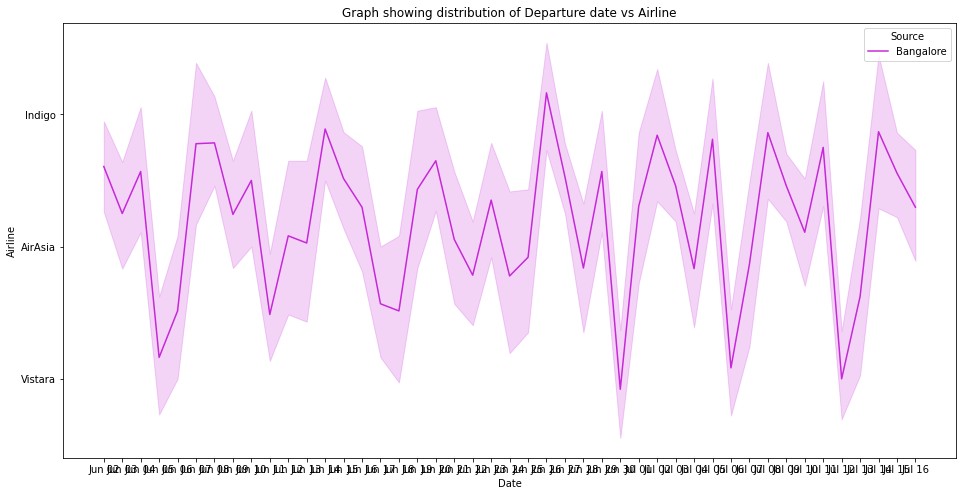

In [40]:
plt.figure(figsize=(16,8), facecolor='white')
sns.lineplot(x='Date', y='Airline', hue='Source', data=flight,palette='gnuplot2_r')
plt.title("Graph showing distribution of Departure date vs Airline")
plt.xticks()
plt.show()

In [41]:
for i in range(len(flight['Arr_time'])):
    flight['Arr_time'][i]=flight['Arr_time'][i].replace('+ 1 day','').split('\n')[0]
    flight['Arr_time'][i]=flight['Arr_time'][i].split(' ')[0]

In [42]:
#Extracting Hour of Arrival and minute of departure from departure attribute 
flight['Hour_Arr']  = pd.to_datetime(flight['Arr_time']).dt.hour
flight['Minute_Arr']  = pd.to_datetime(flight['Arr_time']).dt.minute

#Dropping the arrival_time from the dataset permanently
flight.drop(columns='Arr_time', inplace=True)

In [43]:
for i in range(0,24):
    if i<=6:
        flight['Hour_Arr'].replace(i,'Early Morning',inplace=True)
        
    elif i>6 and i <=12:
        flight['Hour_Arr'].replace(i,'Morning',inplace=True)
        
    elif i>12 and i<=18:
        flight['Hour_Arr'].replace(i,'Afternoon',inplace=True)
        
    elif i>18 and i<=23:
        flight['Hour_Arr'].replace(i,'Night',inplace=True)
    else:
        pass
        
flight['Hour_Arr'].value_counts()

Night            488
Afternoon        486
Morning          382
Early Morning    300
Name: Hour_Arr, dtype: int64

In [44]:
#Extracting Hour of departure and minute of departure from departure attribute 
flight['Hour_Dep']  = pd.to_datetime(flight['Dep_time']).dt.hour
flight['Minute_Dep']  = pd.to_datetime(flight['Dep_time']).dt.minute

#Dropping the dep_time from the dataset permanently.
flight.drop(columns='Dep_time', inplace=True)

In [45]:
for i in range(0,24):
    if i<=6:
        flight['Hour_Dep'].replace(i,'Early Morning',inplace=True)
    elif i>6 and i <=12:
        flight['Hour_Dep'].replace(i,'Morning',inplace=True)
    elif i>12 and i<=18:
        flight['Hour_Dep'].replace(i,'Afternoon',inplace=True)
    elif i>18 and i<24:
        flight['Hour_Dep'].replace(i,'Night',inplace=True)
    else:
        pass
        
flight['Hour_Dep'].value_counts()

Morning          507
Afternoon        418
Early Morning    367
Night            364
Name: Hour_Dep, dtype: int64

In [46]:
flight.nunique()

Airline          6
Source           1
Destination      1
Durtion        140
Route           27
stop             3
Date            45
price           42
Hour_Arr         4
Minute_Arr      12
Hour_Dep         4
Minute_Dep      12
dtype: int64

In [47]:
# we have some values where hour value is missing, and minutes missing in some data, Let us make the data complete before extracting particular values.
 
lst = list(flight['Durtion'])
Dur_hr = []
Dur_sec=[]
for i in range(len(lst)):
    if(lst[i].split() == 2):
        pass
    else:
        if('h' in lst[i]):
            lst[i] = lst[i]+'0m'
        else:
            lst[i] = '0h'+lst[i]
    
for i in range(len(lst)):  
    Dur_hr.append(lst[i].split('h')[0])
    Dur_sec.append(lst[i].split('m')[0].split('h')[-1].replace(' ',''))
    
flight['Dur_hr']=Dur_hr
flight['Dur_sec']=Dur_sec

#Converting Dur_hr, Dur_sec columns into numerical datatypes
flight['Dur_hr'] = flight['Dur_hr'].astype(int)
flight['Dur_sec'] = flight['Dur_sec'].astype(int)


flight.drop(['Durtion'], inplace=True,axis=1)

Night            488
Afternoon        486
Morning          382
Early Morning    300
Name: Hour_Arr, dtype: int64


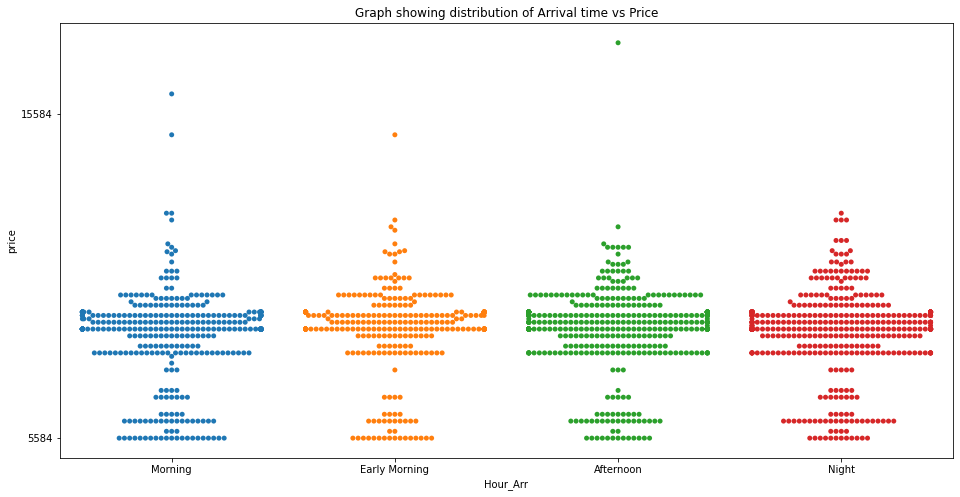

In [48]:
print(flight['Hour_Arr'].value_counts())

plt.figure(figsize=(16,8), facecolor='white')
sns.swarmplot(y='price',x='Hour_Arr',data=flight) 
plt.title("Graph showing distribution of Arrival time vs Price")
plt.xticks(rotation=0)
plt.yticks(np.arange(min(flight['price']), max(flight['price']), 10000))
plt.show()

Morning          507
Afternoon        418
Early Morning    367
Night            364
Name: Hour_Dep, dtype: int64


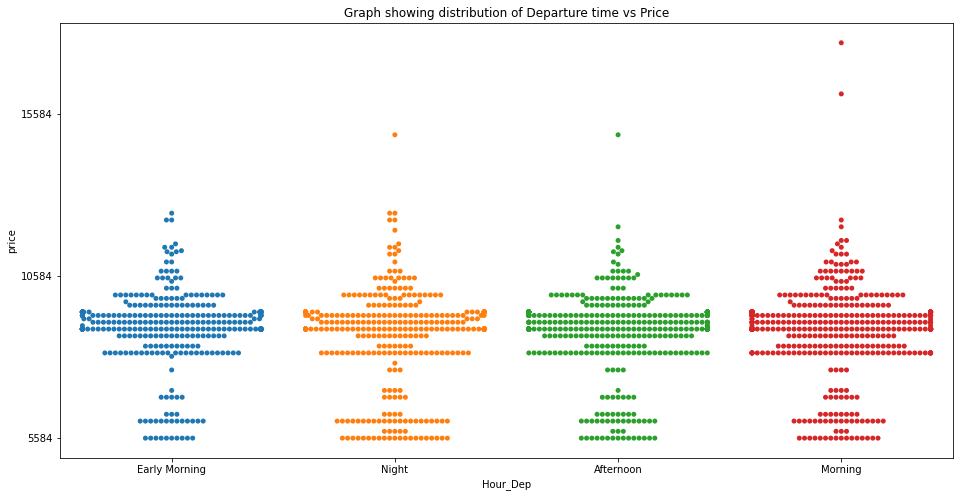

In [49]:
print(flight['Hour_Dep'].value_counts())

plt.figure(figsize=(16,8), facecolor='white')
sns.swarmplot(y='price',x='Hour_Dep',data=flight) 
plt.title("Graph showing distribution of Departure time vs Price")
plt.xticks(rotation=0)
plt.yticks(np.arange(min(flight['price']), max(flight['price']), 5000))
plt.show()

#  Observations
- We see that the early morning flights from 0 to 6 AM have the price ranges below 10000 which is average price range of flights. There is increase in price
- range during working hours i.e, from 9 am to 6 pm we can see there is spikes in flight prices where we can see the highest price. Further the extended.
- evening hours have mixed ranges of price where we can see average price also higher ranges that might be affected by some other factors.

# Feature Engineering

In [50]:
for i in flight:
    if flight[i].dtype == 'object':
        print(flight[i].value_counts())

Vistara      415
Indigo       351
Air India    263
AirAsia      251
GO FIRST     226
SpiceJet     150
Name: Airline, dtype: int64
Bangalore    1656
Name: Source, dtype: int64
Delhi    1656
Name: Destination, dtype: int64
BLR--->BOM    501
BLR--->DEL    287
BLR--->HYD    241
BLR--->PNQ    110
BLR--->CCU     77
BLR--->GOI     74
BLR--->PAT     36
BLR--->IXR     36
BLR--->DBR     28
BLR--->GAU     26
BLR--->LKO     25
BLR--->JAI     23
BLR--->IDR     22
BLR--->COK     21
BLR--->MAA     17
BLR--->RPR     16
BLR--->BBI     15
BLR--->JLR     14
BLR--->IXC     14
BLR--->IXB     14
BLR--->AMD     14
BLR--->CJB     11
BLR--->NAG      9
BLR--->DED      7
BLR--->VTZ      7
BLR--->JRG      7
BLR--->VNS      4
Name: Route, dtype: int64
Jun 30    38
Jul 02    38
Jul 14    38
Jun 02    38
Jul 16    37
Jun 09    37
Jun 06    37
Jul 03    37
Jun 28    37
Jul 07    37
Jun 22    37
Jun 21    37
Jul 09    37
Jun 26    37
Jun 25    37
Jun 08    37
Jul 13    37
Jun 17    37
Jun 20    37
Jun 18    37
Jun 15 

In [51]:
#Replacing the categorical values of Arrival time by numerical
flight['Hour_Arr'].replace({'Early Morning':0,'Morning':1,'Afternoon':2,'Night':3},inplace=True)

#Replacing the categorical values of Departure time by numerical
flight['Hour_Dep'].replace({'Early Morning':0,'Morning':1,'Afternoon':2,'Night':3},inplace=True)

In [52]:
col =['Airline','Source','Destination']
flight = pd.get_dummies(flight,drop_first=True)
flight

,stop,price,Hour_Arr,Minute_Arr,Hour_Dep,Minute_Dep,Dur_hr,Dur_sec,Airline_AirAsia,Airline_GO FIRST,...,Date_Jun 21,Date_Jun 22,Date_Jun 23,Date_Jun 24,Date_Jun 25,Date_Jun 26,Date_Jun 27,Date_Jun 28,Date_Jun 29,Date_Jun 30
0,0,5584,1,35,0,55,2,40,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5584,0,15,3,30,2,45,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,5584,0,35,3,50,2,45,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,6844,1,40,0,45,2,55,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,6844,0,30,0,45,2,45,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,1,9679,3,55,1,45,12,10,0,0,...,0,0,0,0,0,0,0,0,0,0
1652,1,9679,1,0,3,10,12,50,0,0,...,0,0,0,0,0,0,0,0,0,0
1653,1,9679,3,45,1,45,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1654,1,9889,1,30,3,10,16,20,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#Dropping 'Minute_Arr', 'Minute_Dep','Dur_sec',Dur_hr' as we have already extracted useful information from the main attributes

flight.drop(['Minute_Arr', 'Minute_Dep','Dur_sec', 'Dur_hr'],inplace=True,axis=1)

In [54]:
flight

,stop,price,Hour_Arr,Hour_Dep,Airline_AirAsia,Airline_GO FIRST,Airline_Indigo,Airline_SpiceJet,Airline_Vistara,Route_BLR--->BBI,...,Date_Jun 21,Date_Jun 22,Date_Jun 23,Date_Jun 24,Date_Jun 25,Date_Jun 26,Date_Jun 27,Date_Jun 28,Date_Jun 29,Date_Jun 30
0,0,5584,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5584,0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,5584,0,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,6844,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,6844,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,1,9679,3,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1652,1,9679,1,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1653,1,9679,3,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1654,1,9889,1,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Checking for Outliers

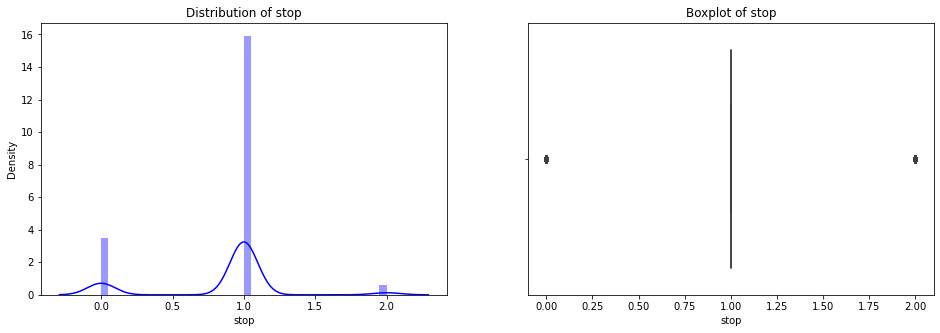

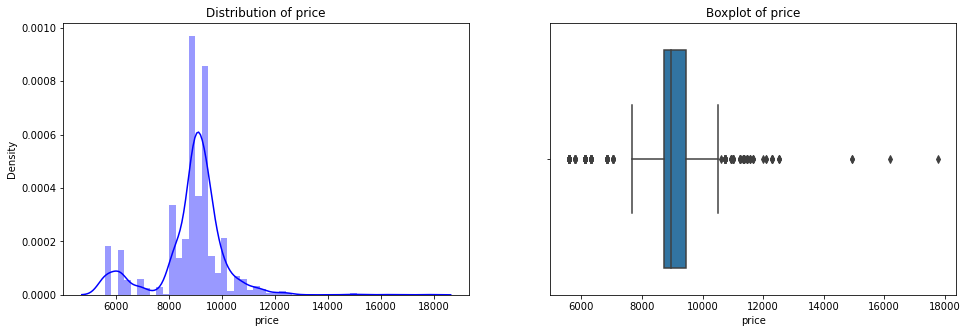

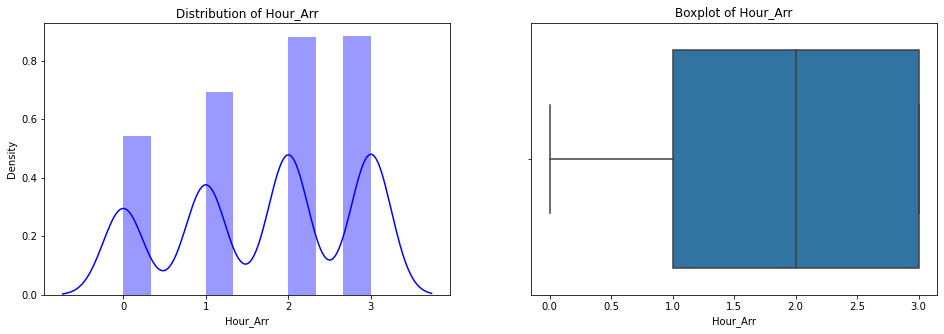

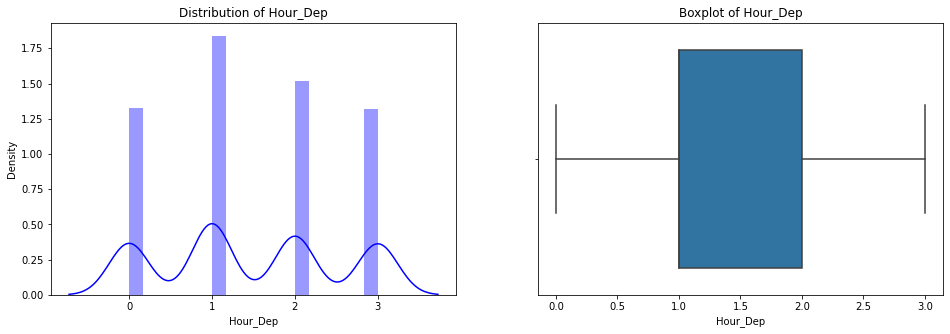

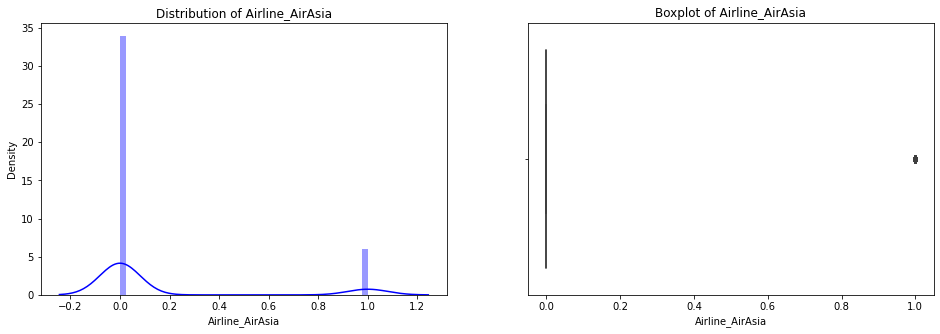

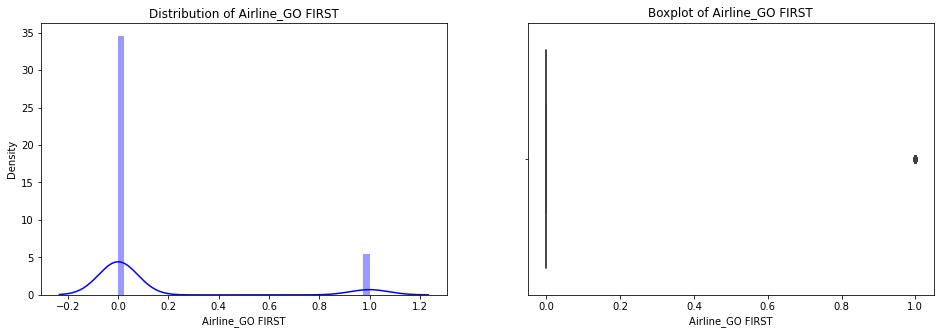

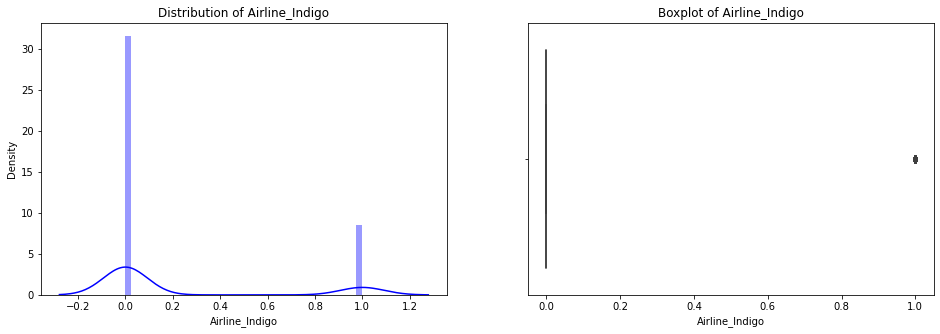

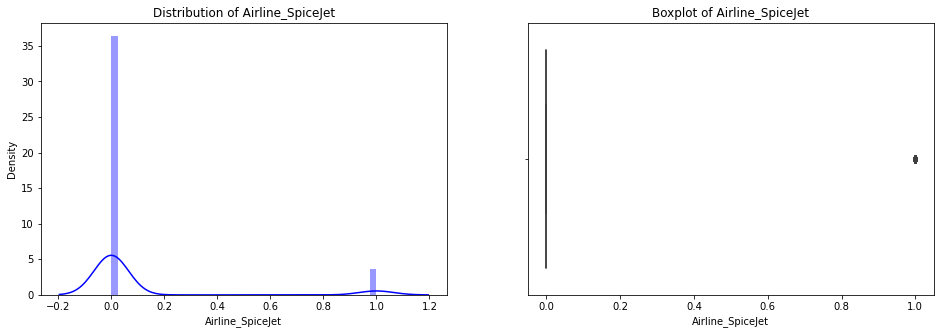

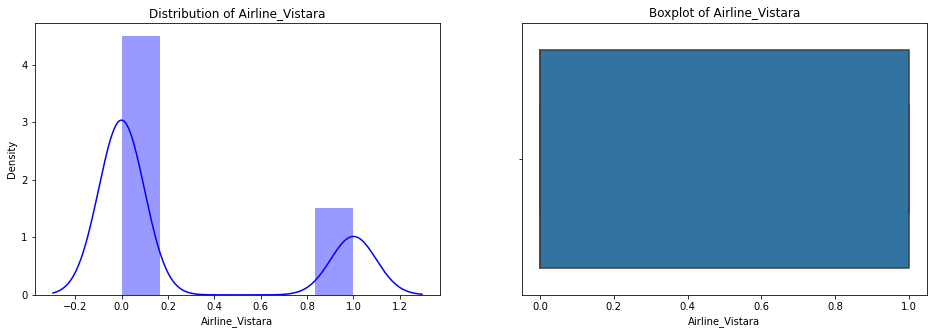

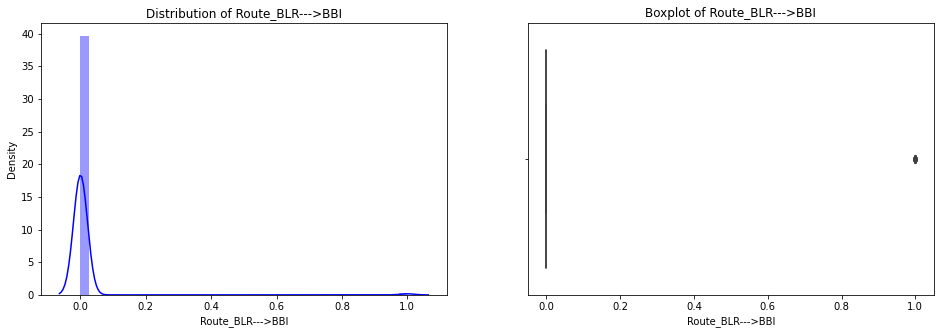

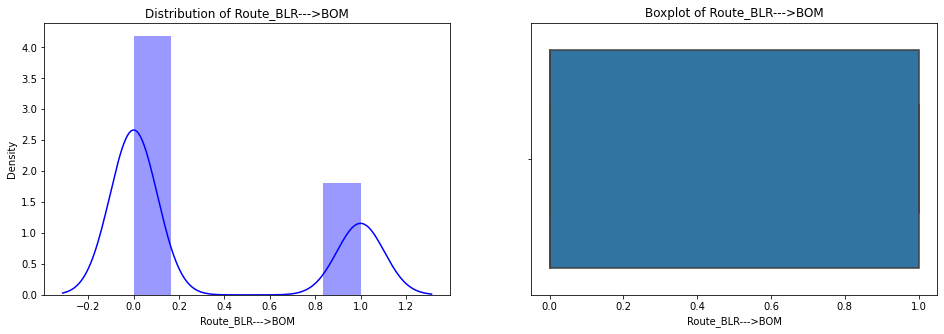

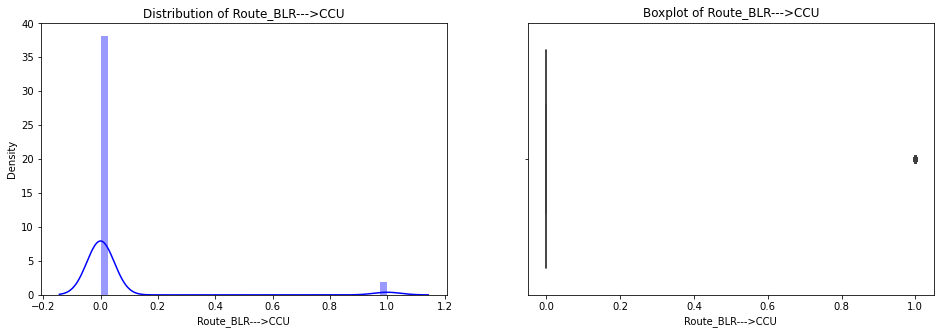

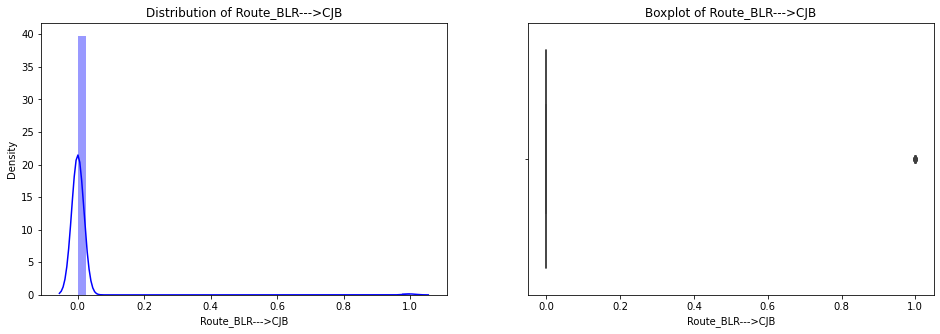

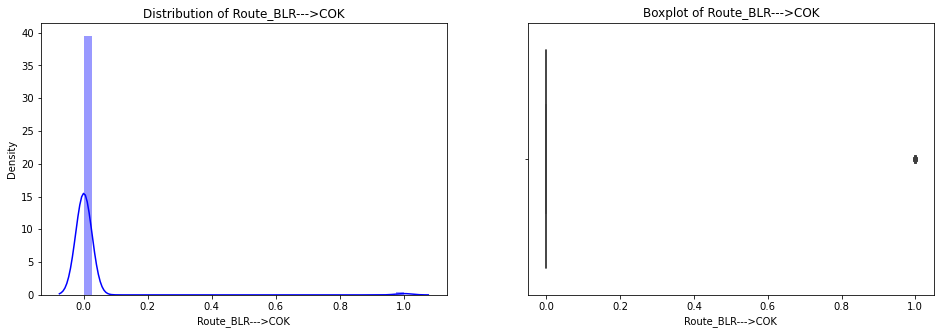

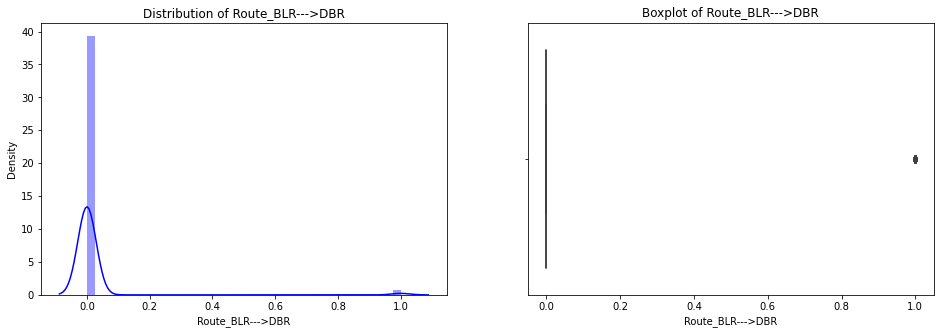

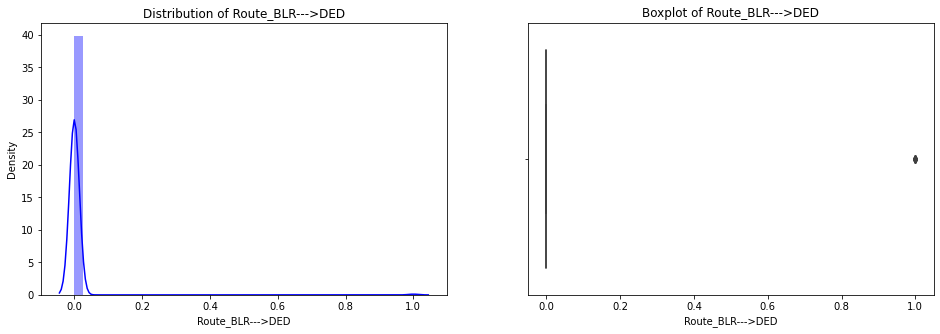

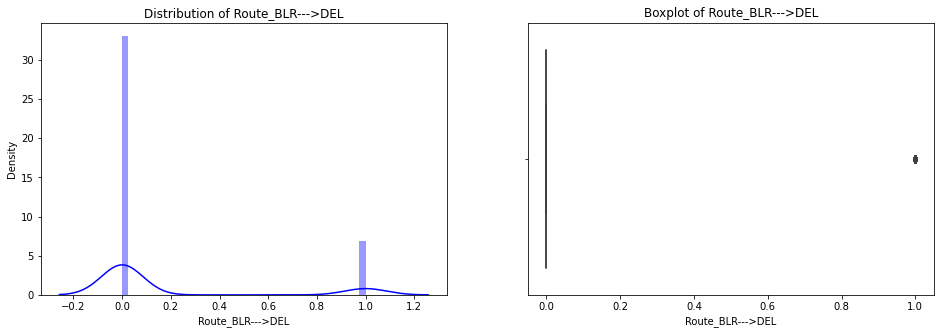

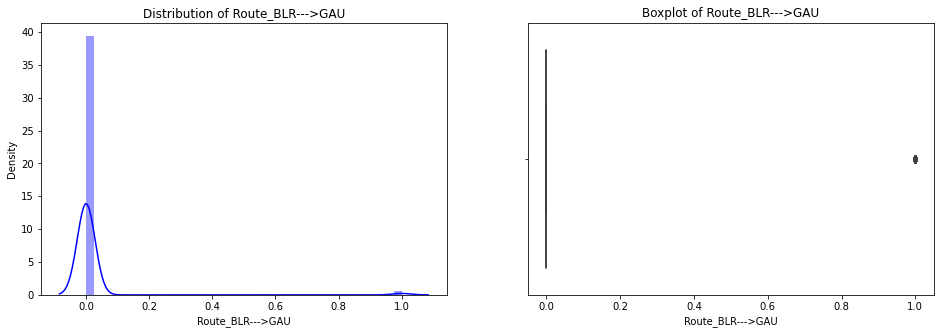

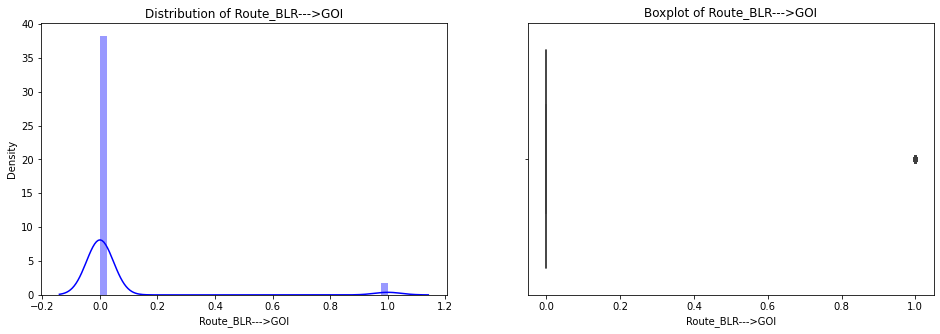

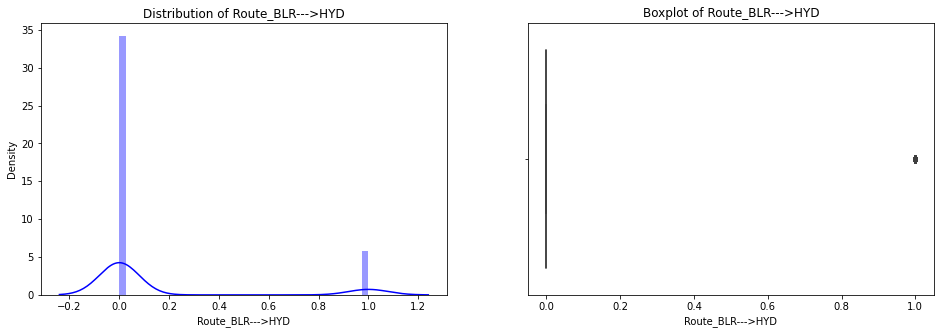

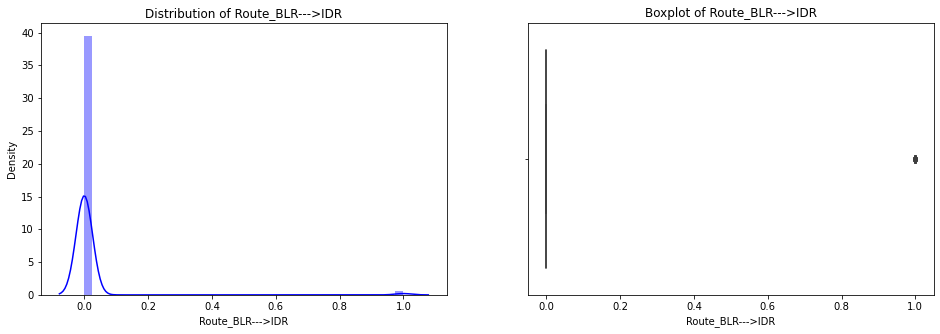

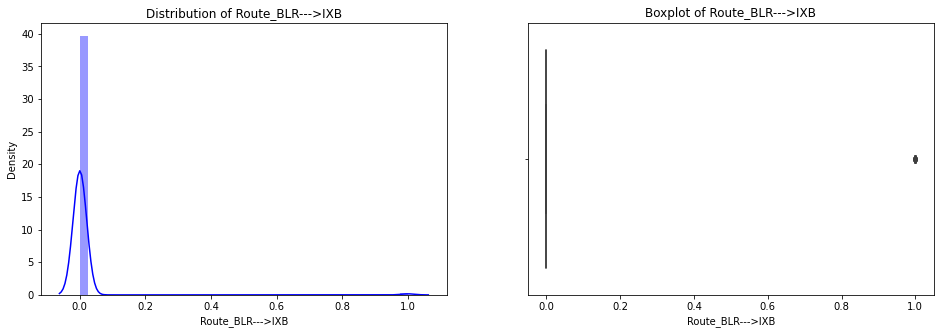

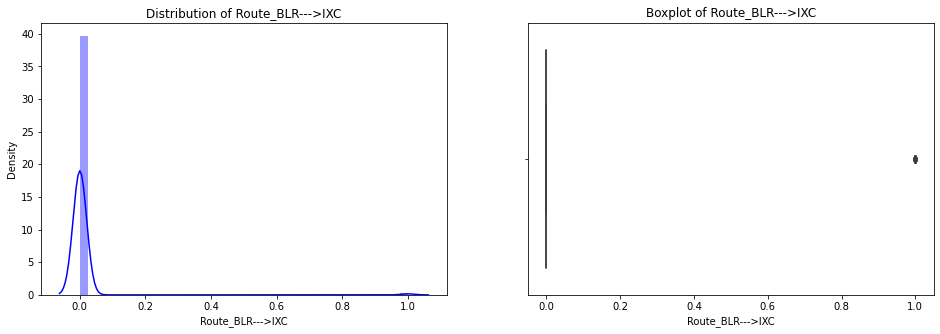

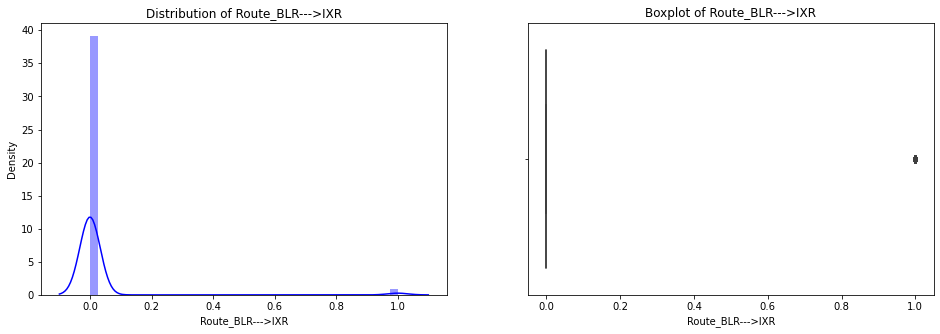

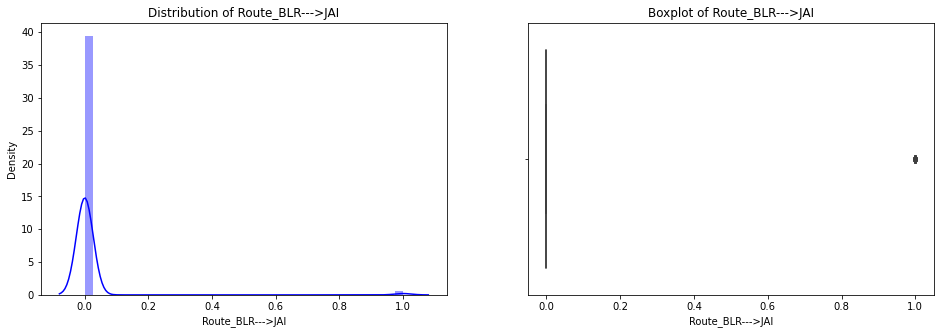

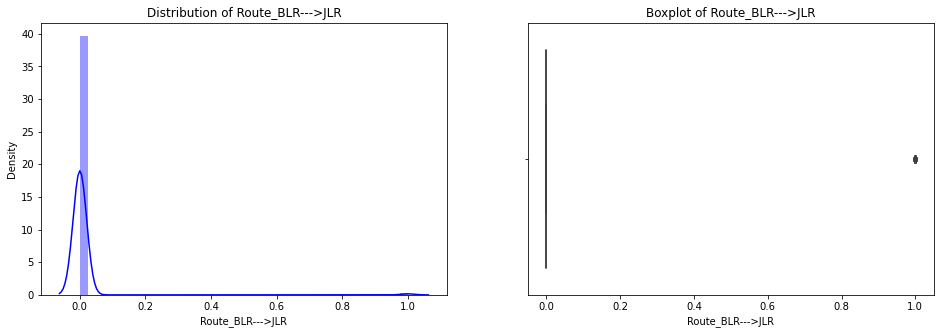

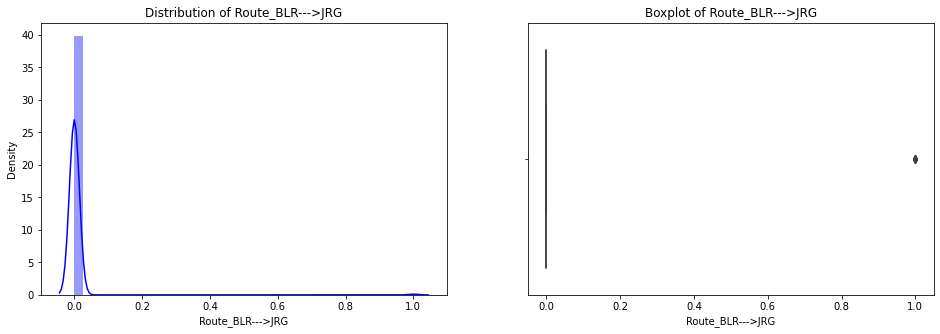

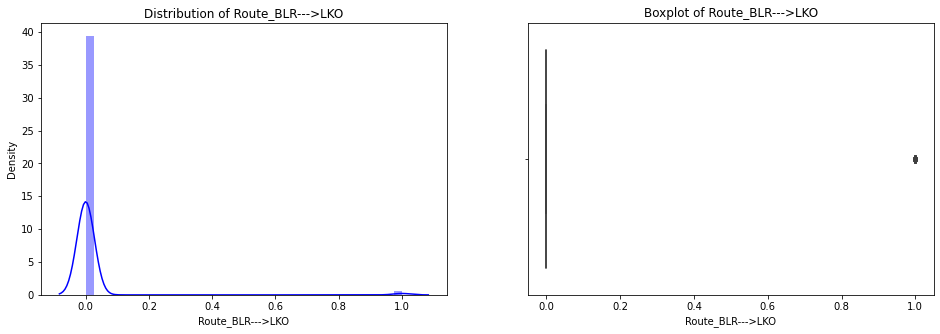

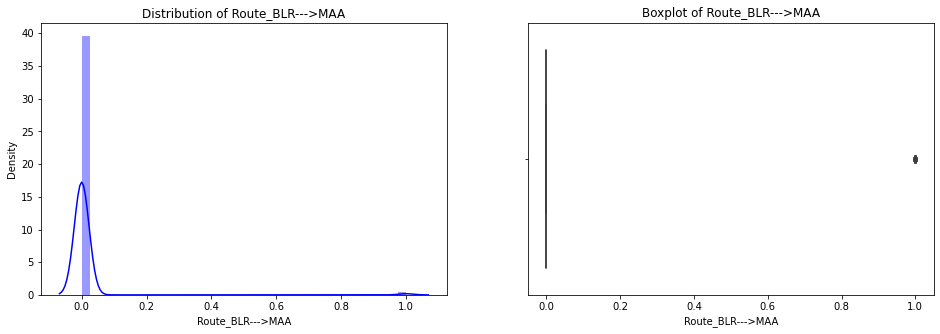

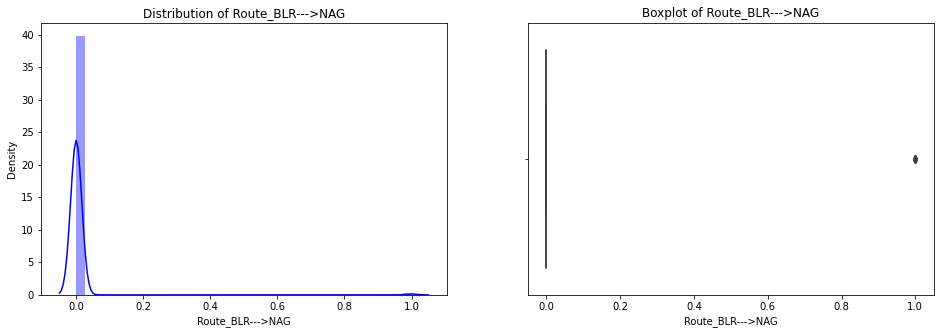

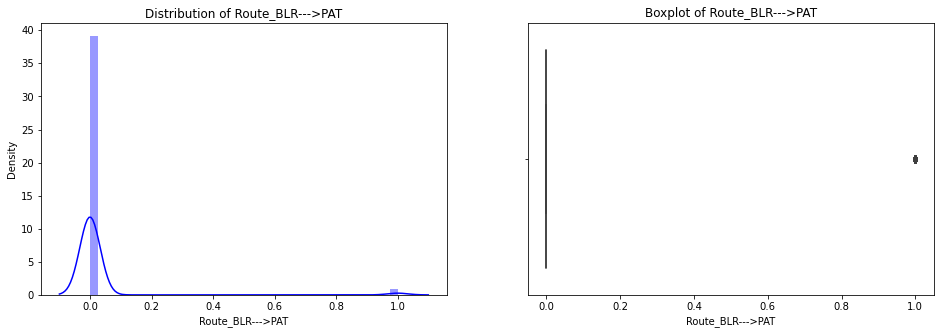

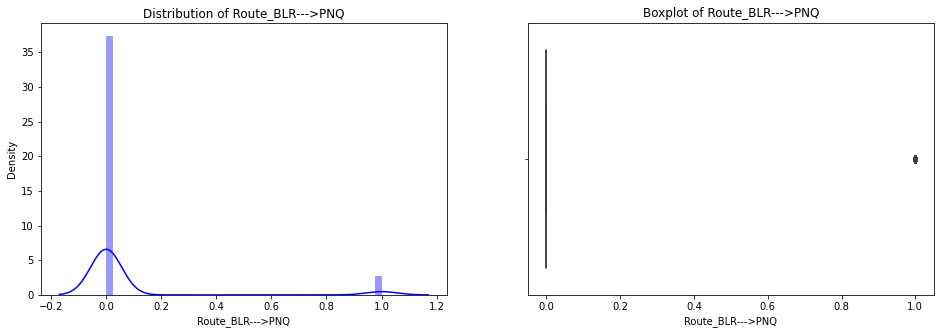

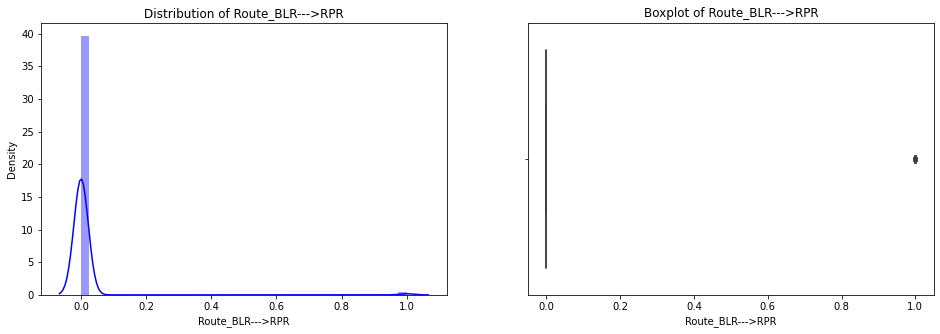

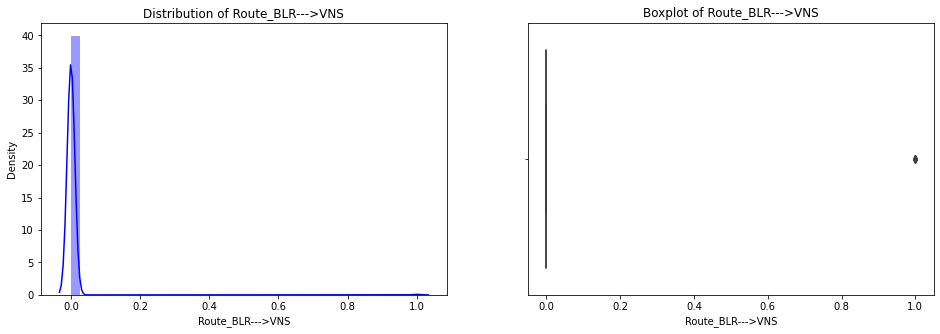

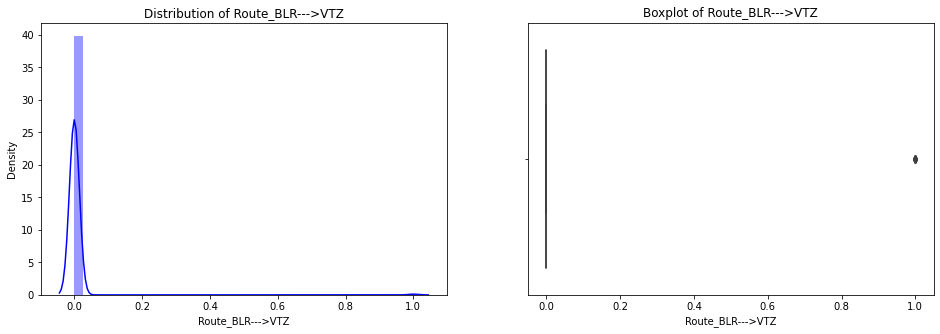

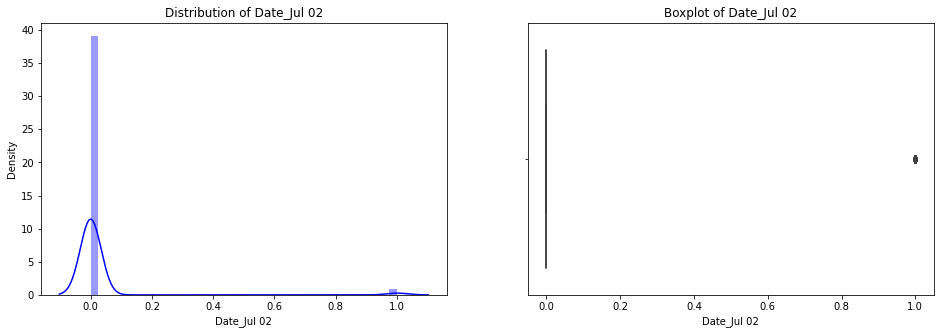

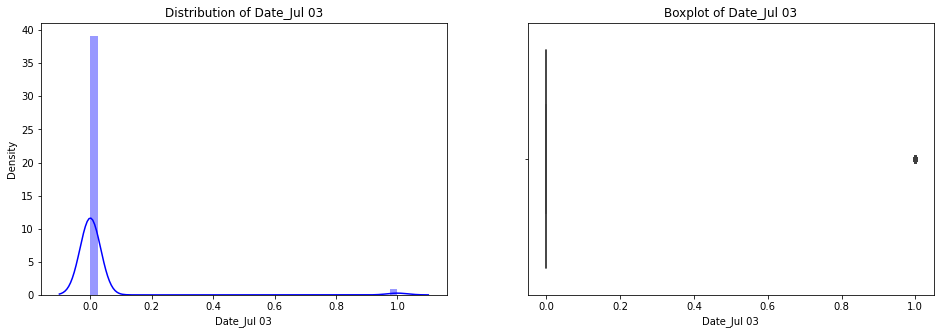

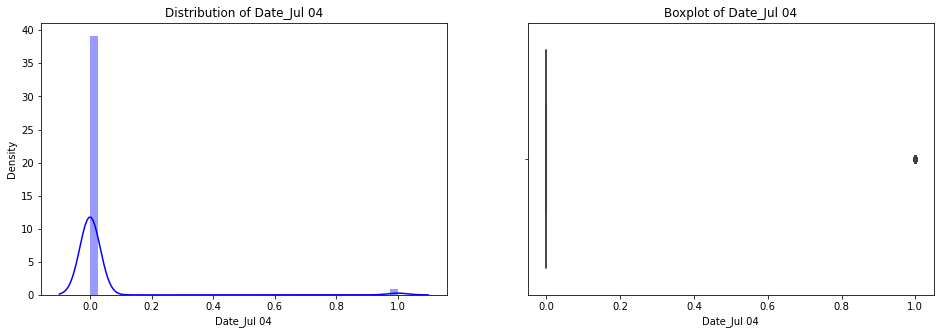

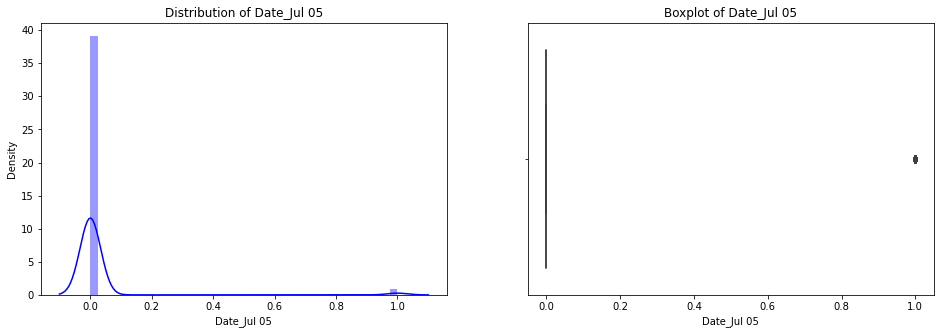

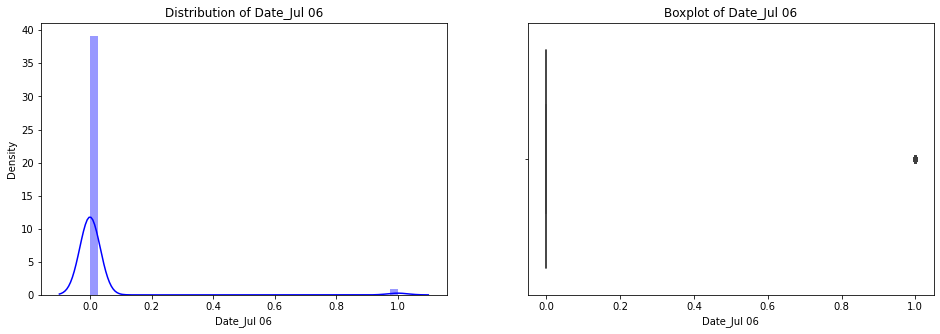

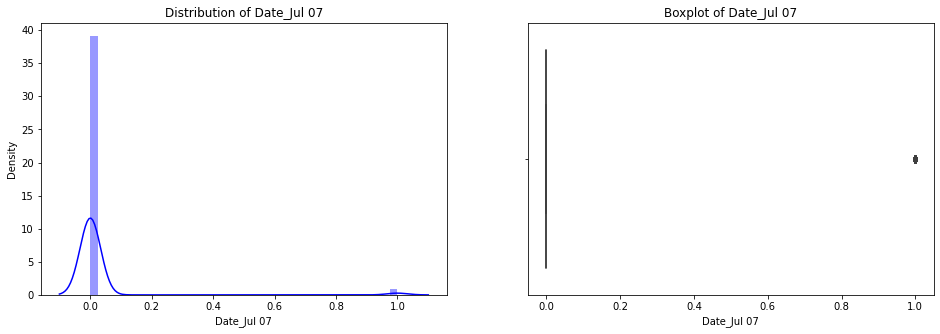

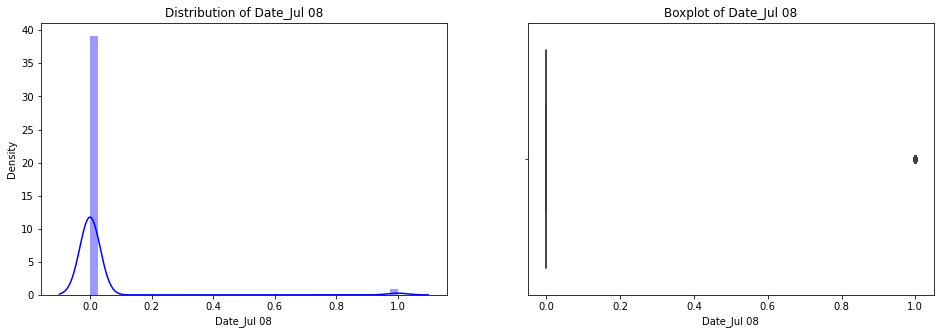

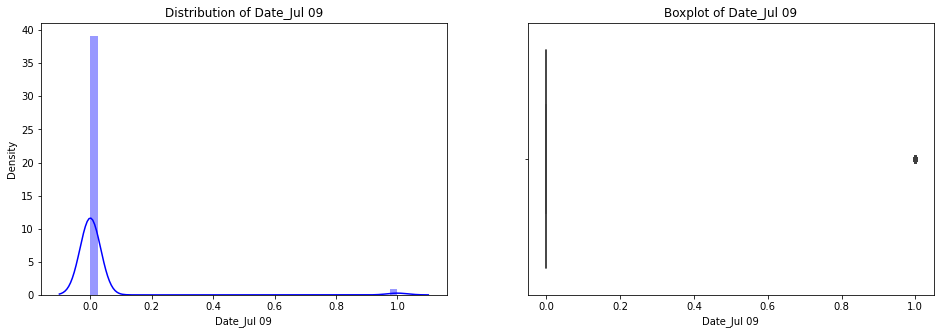

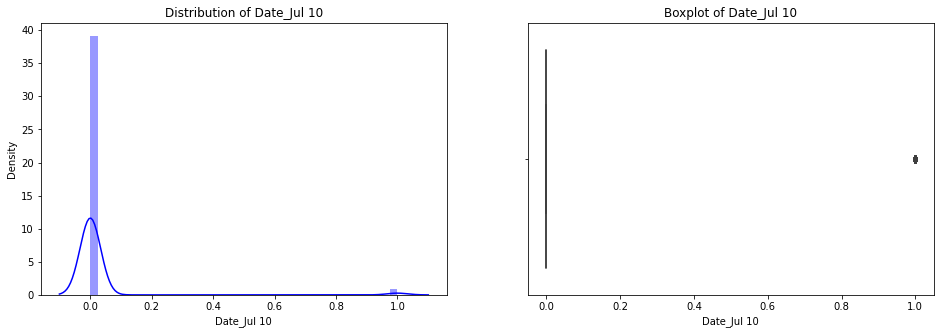

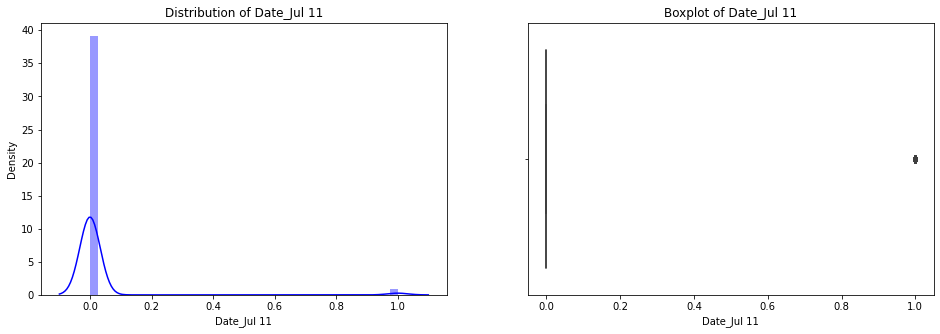

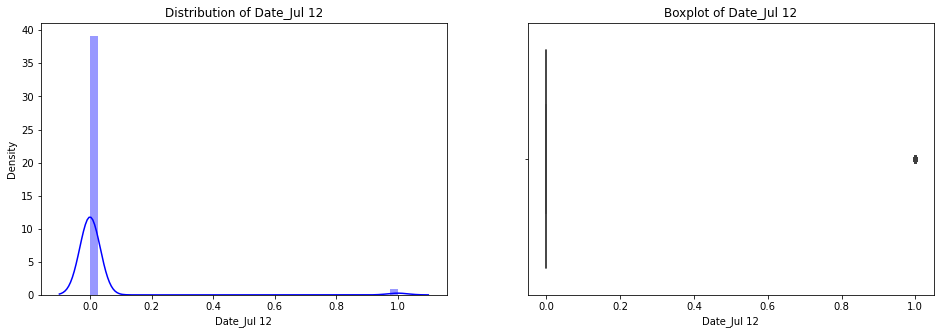

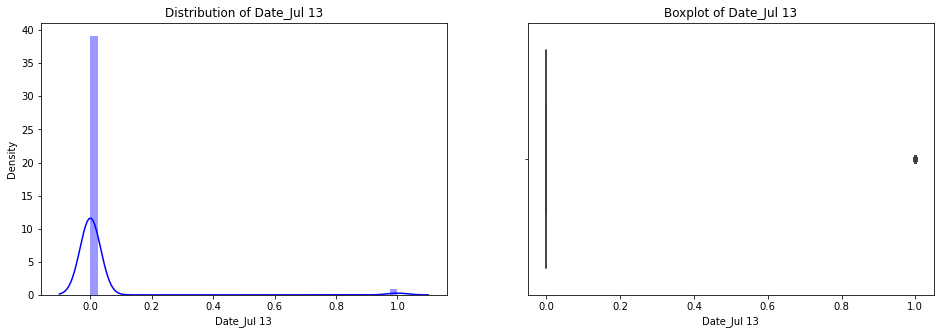

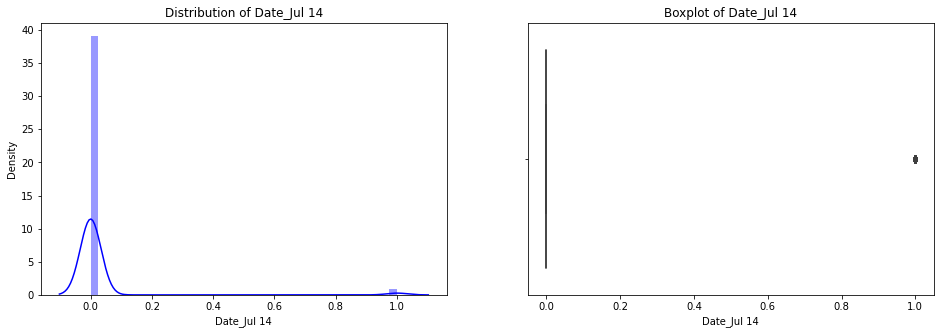

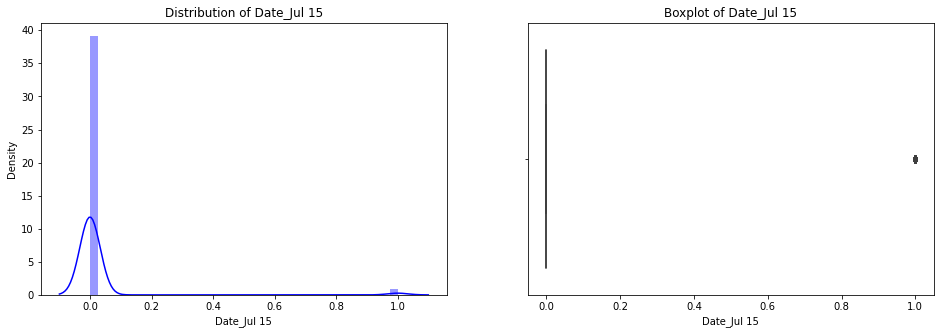

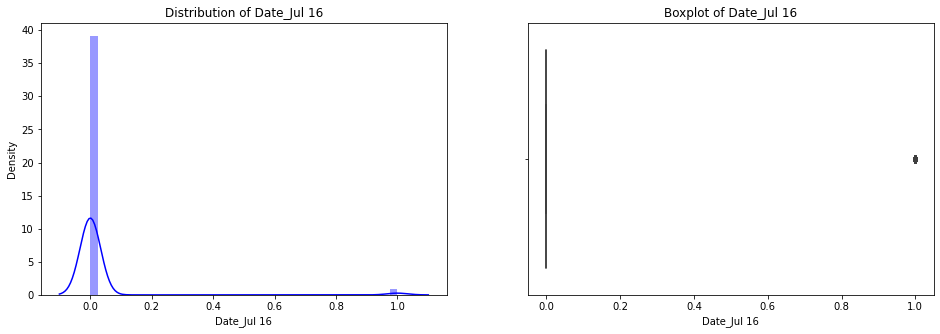

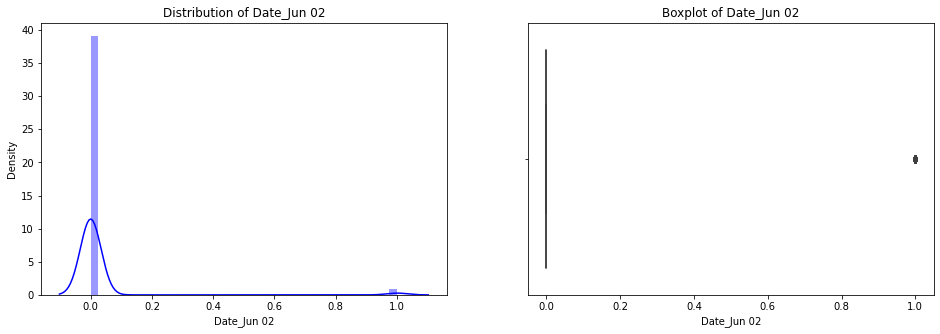

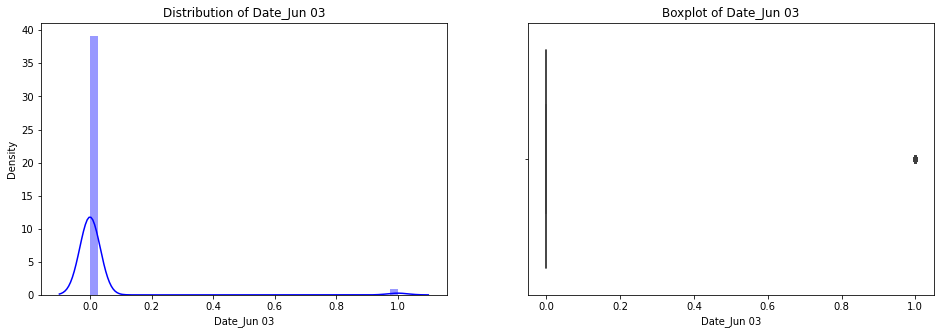

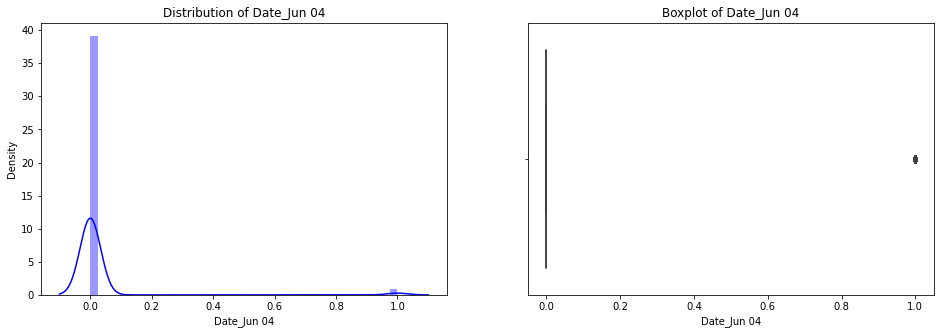

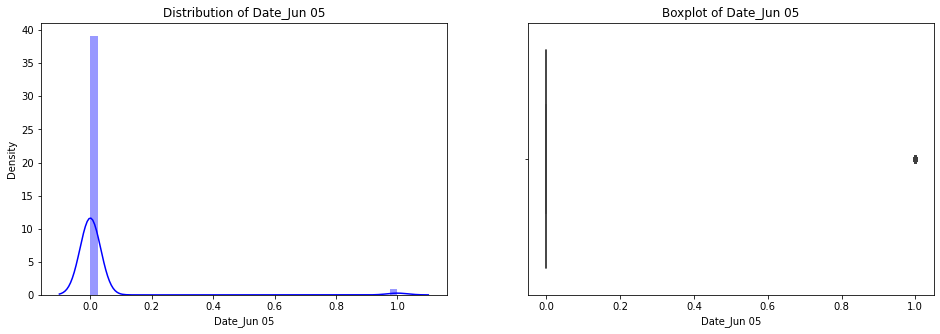

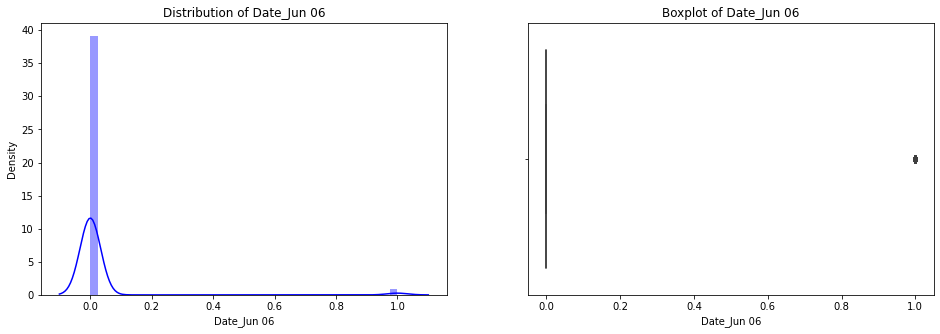

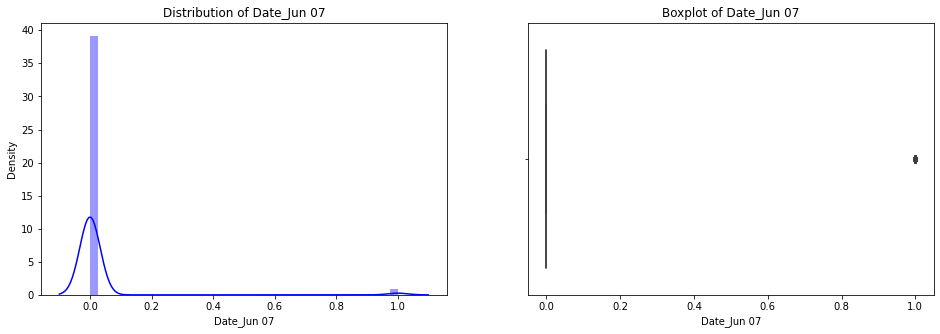

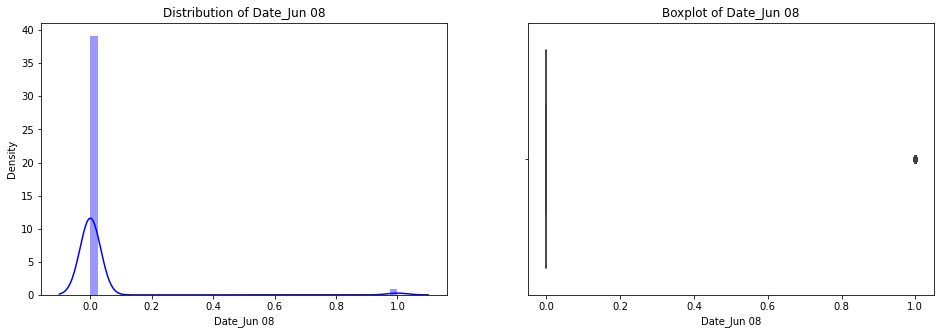

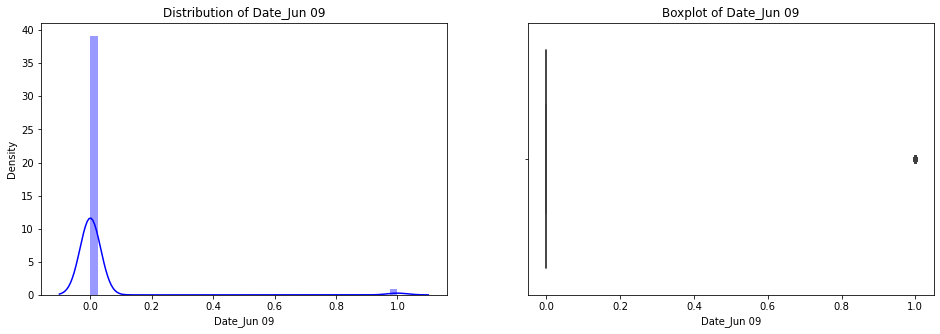

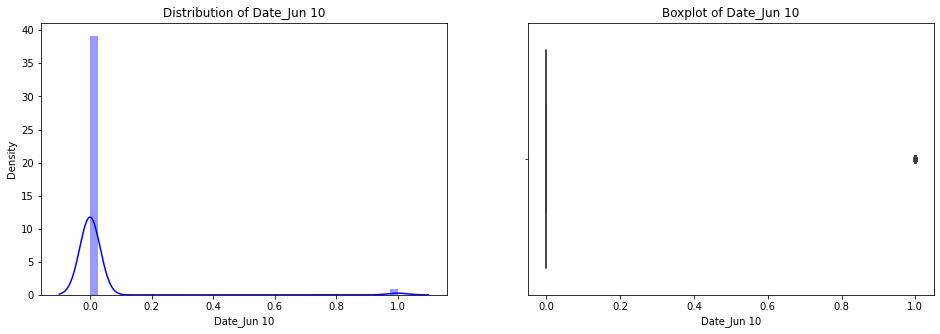

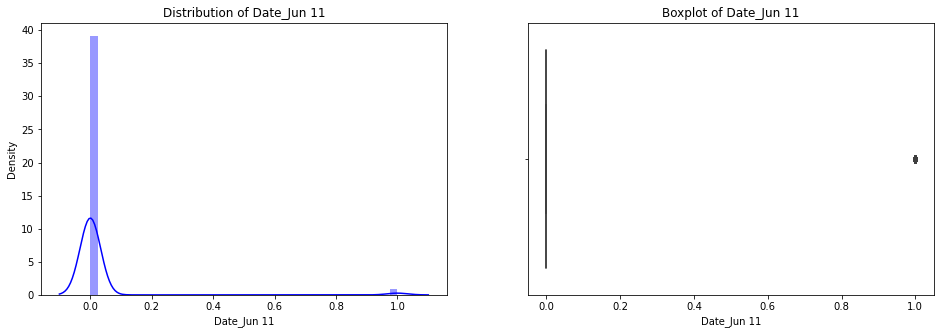

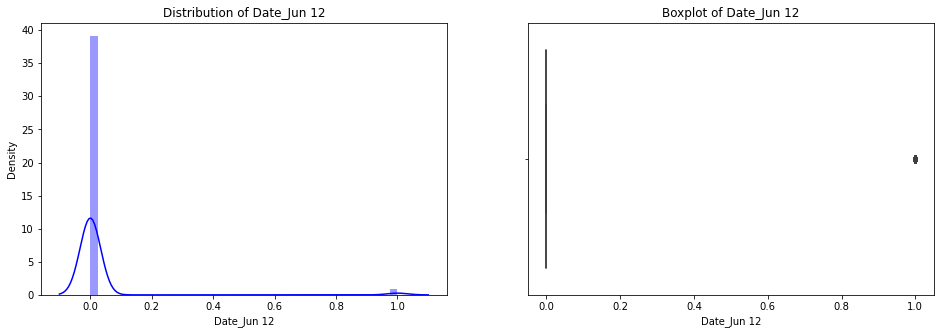

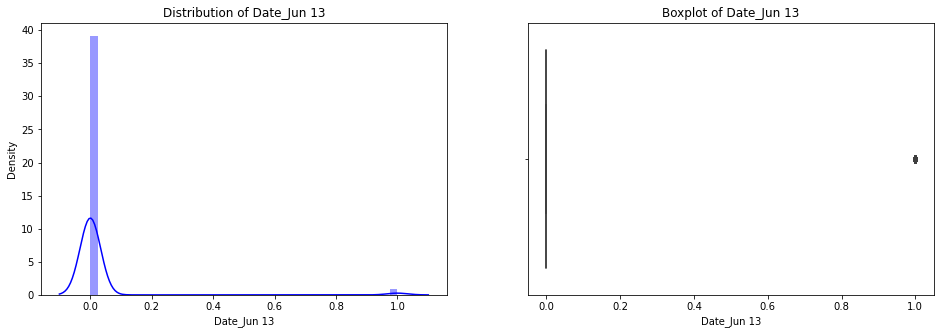

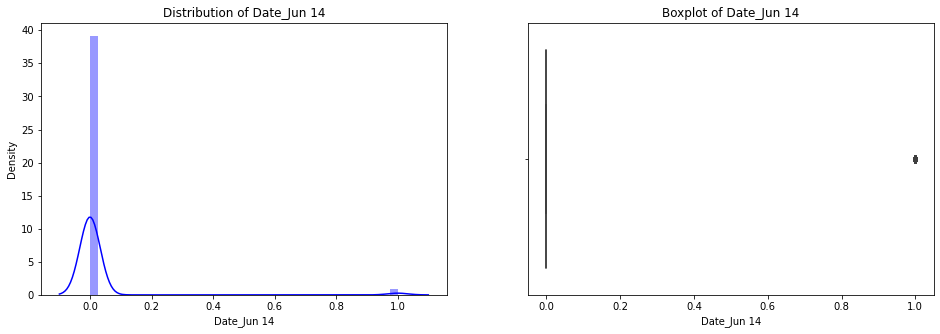

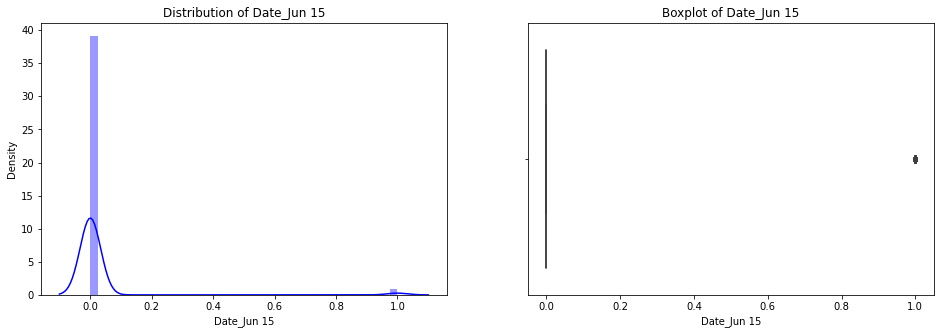

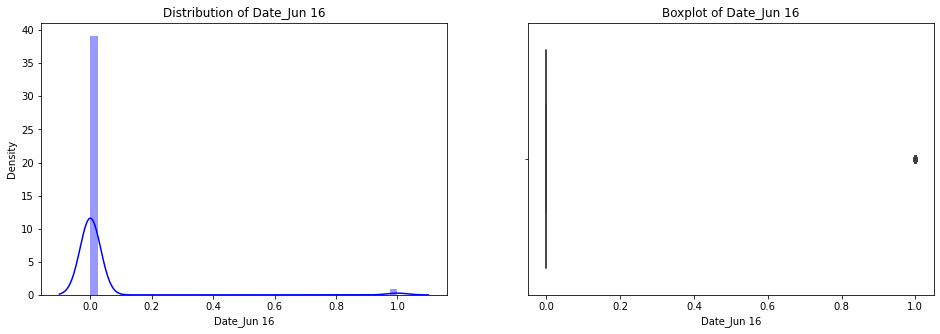

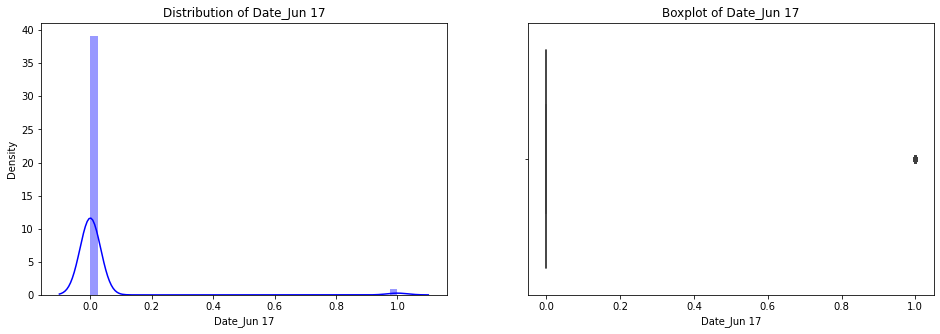

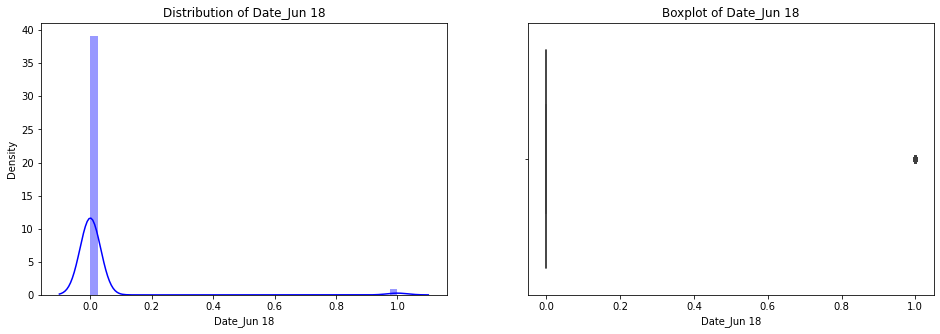

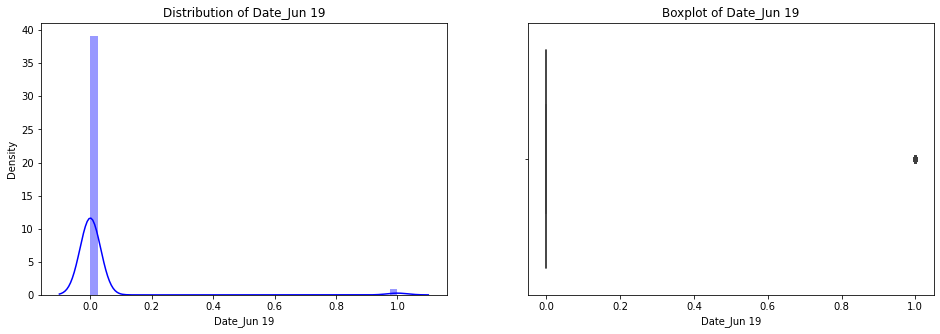

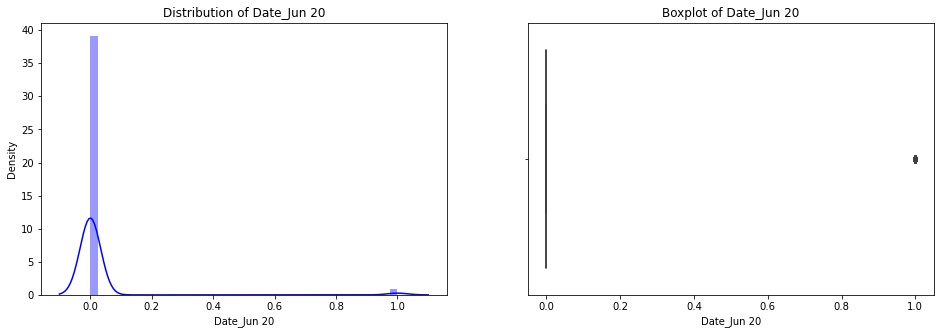

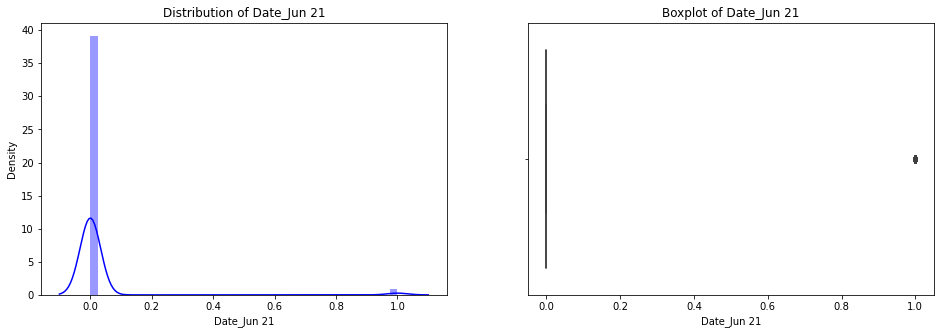

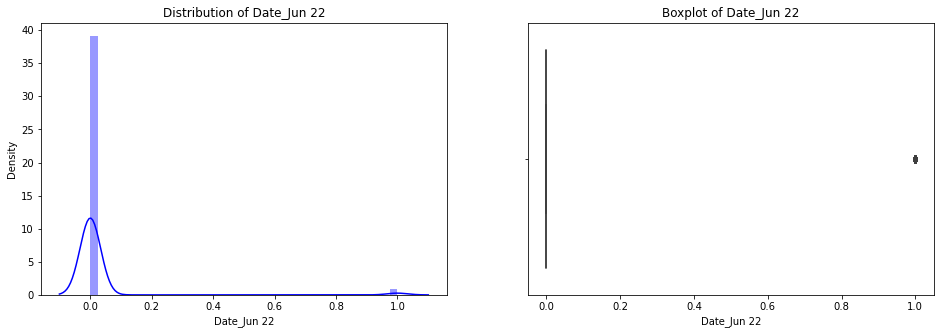

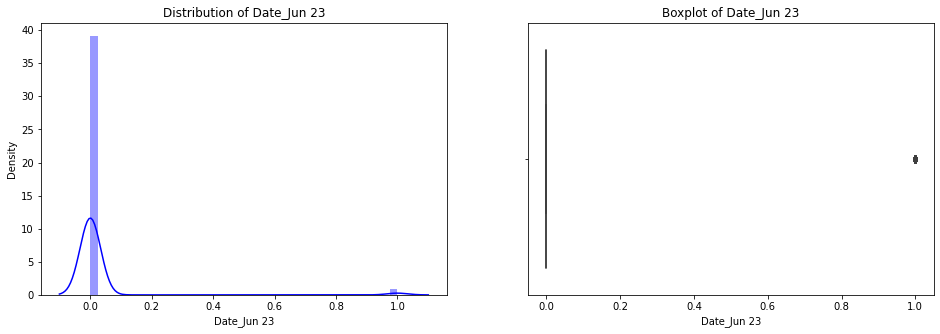

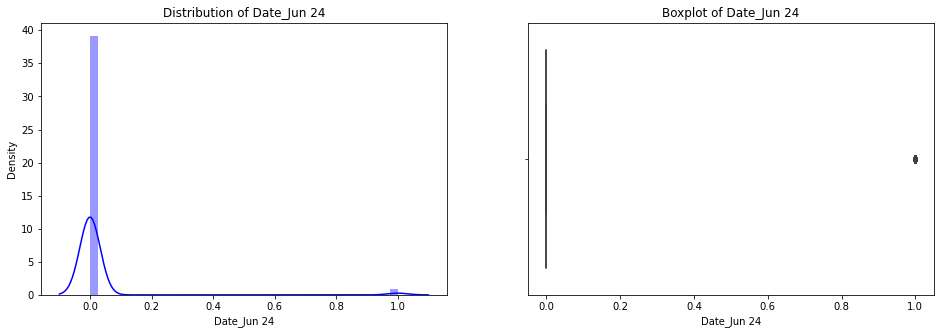

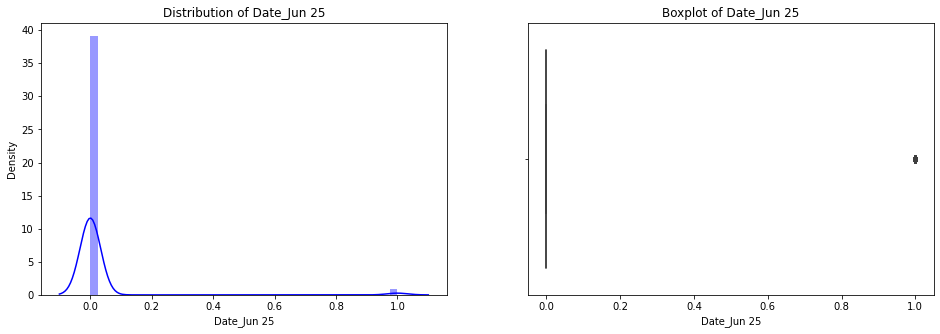

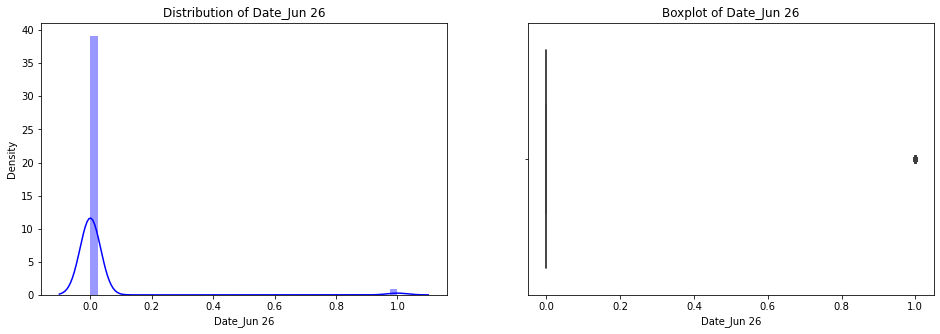

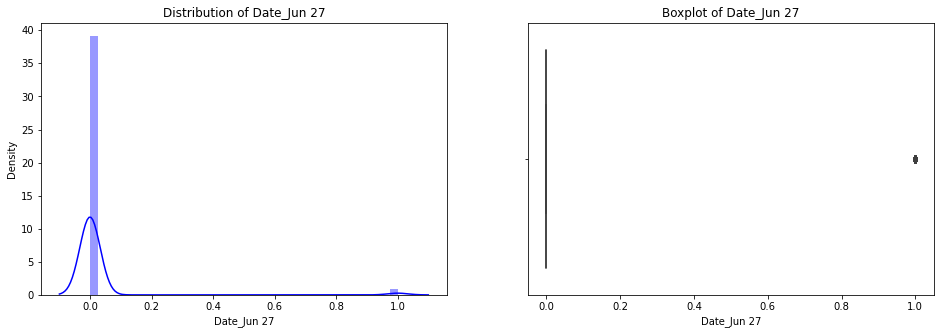

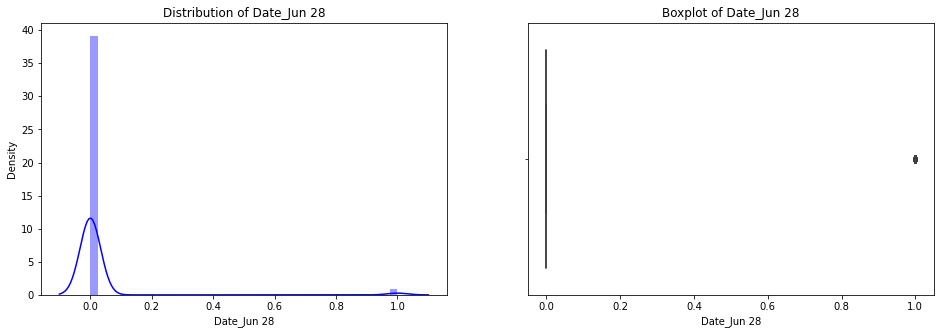

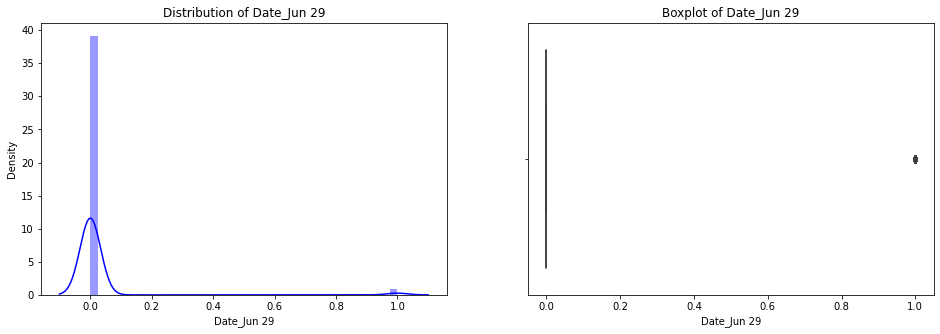

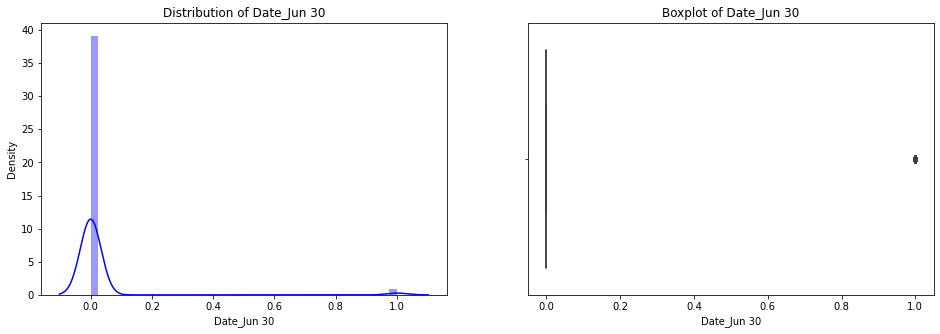

In [55]:
for i in flight:    
    plt.figure(figsize=(16,5), facecolor='white')
    ax1 = plt.subplot(1,2,1)
    sns.distplot(flight[i],color='Blue')
    plt.title('Distribution of {}'.format(i))
    
    ax2 = plt.subplot(1,2,2)
    sns.boxplot(flight[i])
    plt.title('Boxplot of {}'.format(i))
    plt.show()

# There are some outliers in Price attribute let us remove them using z score method.

In [56]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [57]:
# zscore method

col = flight[['price']]
z_score = zscore(col)
abs_sco = np.abs(z_score)

fltr = (abs_sco<3).all(axis=1)
flight = flight[fltr]

# Let's check the skewness and Correlation between the attributes in dataset

In [58]:
flight.skew()

stop              -0.762462
price             -0.983164
Hour_Arr          -0.258300
Hour_Dep           0.073098
Airline_AirAsia    1.947615
                     ...   
Date_Jun 26        6.556616
Date_Jun 27        6.556616
Date_Jun 28        6.461219
Date_Jun 29        6.461219
Date_Jun 30        6.369528
Length: 79, dtype: float64

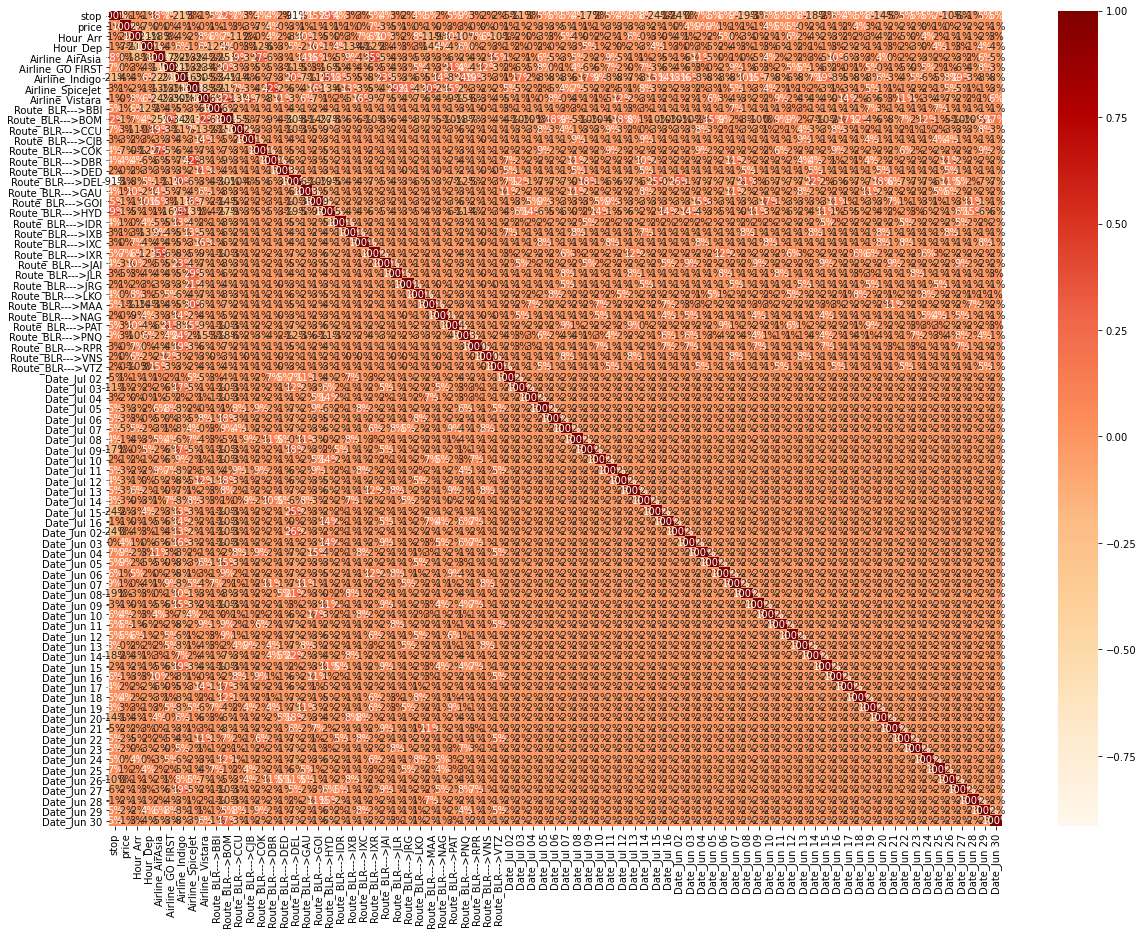

In [59]:
corr = flight.corr()
plt.figure(figsize=(20,15), facecolor='white')
sns.heatmap(corr,fmt='.0%', annot=True, cmap='OrRd')
plt.show()

price               1.000000
Date_Jun 05         0.091436
Date_Jun 04         0.088281
Route_BLR--->IXR    0.072943
Date_Jun 12         0.045858
Date_Jun 11         0.045508
Date_Jun 18         0.043404
Date_Jun 10         0.042964
Date_Jun 03         0.041542
Route_BLR--->DBR    0.038511
Route_BLR--->PAT    0.031238
Route_BLR--->CCU    0.030088
Route_BLR--->PNQ    0.028342
Date_Jun 19         0.026225
Hour_Arr            0.023919
Date_Jun 17         0.017460
dtype: float64


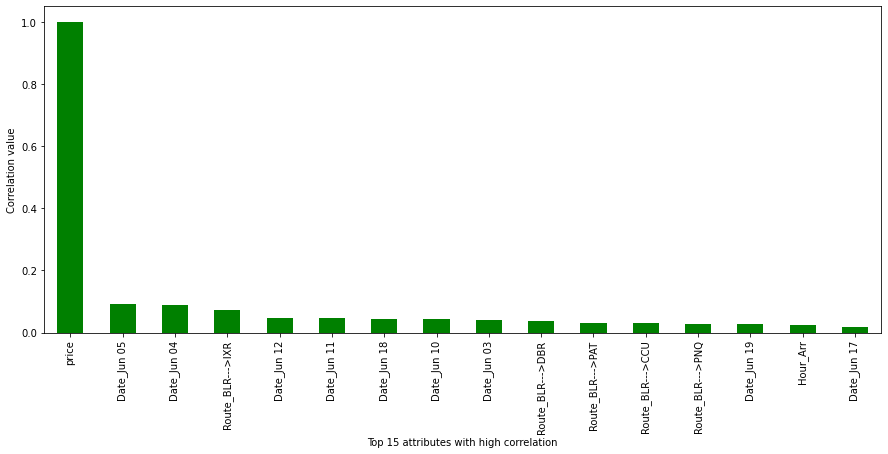

In [60]:
#Checking correlation of attributes with Salesprice
corr_sale = flight.corrwith(flight['price']).sort_values(ascending=False).head(16)
plt.figure(figsize=(15,6))
corr_sale.plot.bar(color='green')
plt.xlabel('Top 15 attributes with high correlation')
plt.ylabel('Correlation value')
plt.style.use('ggplot') 
print(corr_sale)
plt.show()

# Model Building

In [61]:
#Splitting the data
X = flight.drop('price', axis=1)
y = flight['price']

In [62]:
#Checking the importance of the attributes
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['vif']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]


vif

,Features,vif
0,stop,42.189905
1,Hour_Arr,4.330404
2,Hour_Dep,3.611254
3,Airline_AirAsia,4.210427
4,Airline_GO FIRST,2.348080
...,...,...
73,Date_Jun 26,2.070554
74,Date_Jun 27,2.105705
75,Date_Jun 28,2.025790
76,Date_Jun 29,1.966551


# Standardization and splitting the dataset into train and test datasets

In [63]:
#Standardizing the data

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X) 

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,random_state=56, test_size=0.25)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1239, 78), (413, 78), (1239,), (413,))

# Building different models and evaluating the models using different regression metrics

*******************Results********************
The r2 score is: -0.01446360396190971
The mean absolute error 863.2988928008866
The mean squared error 1539833.1592018313
root mean square error 1240.9001407050575
The cross validation score -1.7808831381820746e+26

*****************XXXXXXXXXXX********************


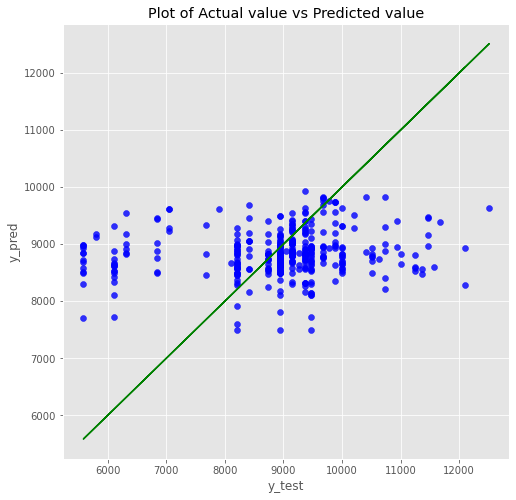

In [65]:
# Linear Regression
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(lm, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

*******************Results********************
The r2 score is: -0.011247022681844188
The mean absolute error 861.7278228973312
The mean squared error 1534950.7775225192
root mean square error 1238.9313046018813
The cross validation score -0.09094418579211028

*****************XXXXXXXXXXX********************


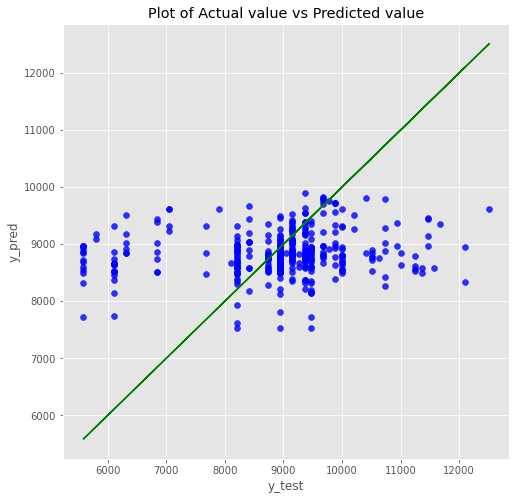

In [66]:
# Lasso
lass_lm = Lasso()
lass_lm.fit(X_train, y_train)
y_pred = lass_lm.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(lass_lm, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

*******************Results********************
The r2 score is: 0.363502797842027
The mean absolute error 645.5110672646563
The mean squared error 966125.8361505873
root mean square error 982.9170036938965
The cross validation score -0.2841733374455352

*****************XXXXXXXXXXX********************


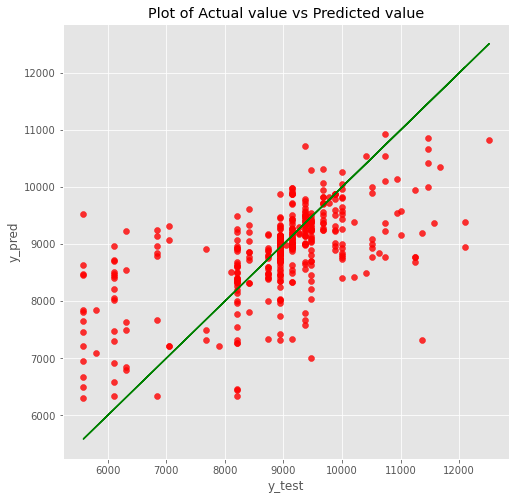

In [67]:
# Random Forest
rand_for = RandomForestRegressor()
rand_for.fit(X_train, y_train)
y_pred = rand_for.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(rand_for, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='red')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

*******************Results********************
The r2 score is: 0.18115398454464926
The mean absolute error 755.1933792536265
The mean squared error 1242909.2990168894
root mean square error 1114.8584210638091
The cross validation score -0.10287116298350503

*****************XXXXXXXXXXX********************


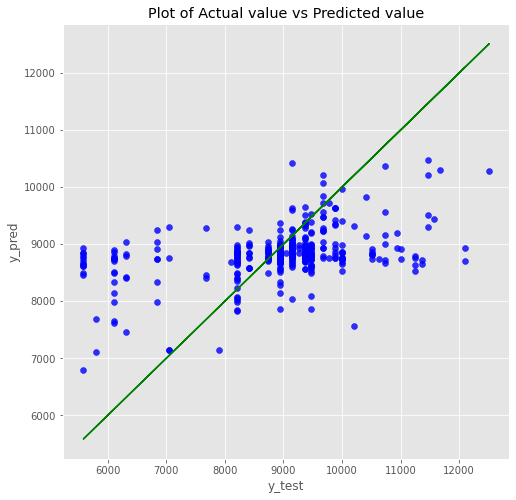

In [68]:
# Gradient Boosting Regression
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(gbr, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

*******************Results********************
The r2 score is: 0.3476899227769451
The mean absolute error 666.2591366525423
The mean squared error 990127.8696118521
root mean square error 995.051691929546
The cross validation score -0.20349051354053235

*****************XXXXXXXXXXX********************


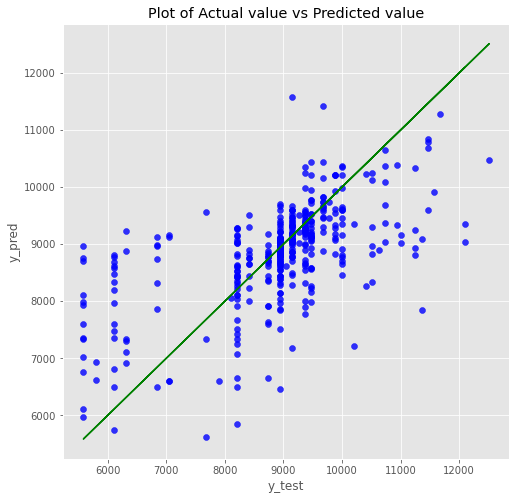

In [69]:
# XGBoost regression
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(xgbr, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

*******************Results********************
The r2 score is: 0.10268762133034237
The mean absolute error 717.9884987893463
The mean squared error 1362011.7562046004
root mean square error 1167.0525935897665
The cross validation score -0.6768697568453625

*****************XXXXXXXXXXX********************


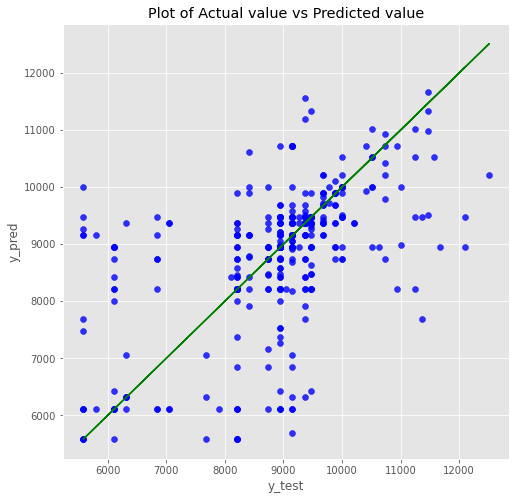

In [70]:
# Deciscion Tree Regression
dec_reg = DecisionTreeRegressor()
dec_reg.fit(X_train, y_train)
y_pred = dec_reg.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(dec_reg, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


# Hyperparameter Optimization

In [71]:
random_forest_grid = RandomForestRegressor()

params = {'max_depth':[1,5,8,12],
           'min_samples_split':[2,4,7,12,16],
           'min_samples_leaf':[1,5,8,3,12],
           'max_features':['auto','sqrt']
         }
          
grid_CV = GridSearchCV(estimator=random_forest_grid, param_grid=params)
grid_CV.fit(X_train, y_train)
grid_CV.best_params_

{'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

*******************Results********************
The r2 score is: 0.08846987656291083
The mean absolute error 799.6039134449677
The mean squared error 1383592.5746356
root mean square error 1176.2621198676763
The cross validation score -0.053183571515969016

*****************XXXXXXXXXXX********************


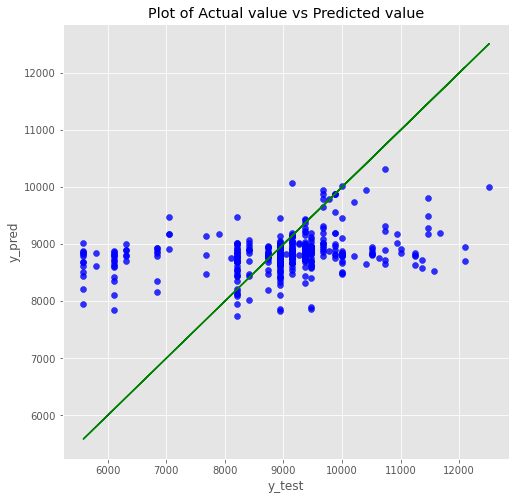

In [72]:
random_forest_grid = RandomForestRegressor(max_depth=12, max_features='auto', min_samples_leaf=3, min_samples_split=12)
random_forest_grid.fit(X_train, y_train)
y_pred = random_forest_grid.predict(X_test)

print("*******************Results********************")
print('The r2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error', mean_absolute_error(y_test, y_pred))
print('The mean squared error', mean_squared_error(y_test, y_pred))
print('root mean square error', math.sqrt(mean_squared_error(y_test, y_pred)))
cv = cross_val_score(random_forest_grid, X,y,cv=5)
print('The cross validation score', cv.mean())

print("\n*****************XXXXXXXXXXX********************")

#graph
plt.figure(figsize=(8,8), facecolor='w')
plt.scatter(y_test, y_pred,alpha=0.8,color='blue')
plt.plot(y_test, y_test, color='green')
plt.title('Plot of Actual value vs Predicted value')
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# Saving the best model

In [73]:
import pickle

file = open('Flight.pkl', 'wb')

pickle.dump('random_forest_grid',file)

In [74]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(random_forest_grid, file)

In [76]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [77]:
y_prediction = forest.predict(X_test)

In [80]:
r2_score(y_test, y_prediction)

0.08846987656291083